# JC3503 Assignment 2024-2025 

## Movies
name:JIABAO HU

email:u16jh22@abdn.ac.uk

ID:50087401


## Introduction

The aim of this project is to analyse a dataset containing information on movies that covers numerous attributes such as budget, revenue, popularity, genre, etc. Through this analysis, it is expected to reveal the patterns and relationships behind the film industry data, pinpoint the core elements that influence the success of a film, and present key trends with the help of visualisation.
The entire analysis process is divided into three main stages: 
1.Exploratory Data Analysis (EDA): Conduct preliminary exploration of the data set, dissecting its structure, distribution characteristics, and associations between variables.
2.Data Mining: applying professional methods to uncover patterns and insights deep within the data.
3.Data Visualisation: Based on the findings of the research, we create detailed and intuitive visualisations to better communicate the results of the analysis.
Next, we will start importing the required libraries and loading the dataset to officially launch the project analysis.

In [3]:
# Import all required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import re
from collections import Counter

# For data mining and modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Import the data
df = pd.read_csv("movies.csv", low_memory=False)

# Display the first few rows to get a sense of the data
df.head()

budget                                             genres                                      homepage      id                                           keywords original_language                            original_title                                           overview  popularity                               production_companies                               production_countries release_date     revenue  runtime                                   spoken_languages    status                                         tagline                                     title  vote_average  vote_count
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...                   http://www.avatarmovie.com/   19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en                                    Avatar  In the 22nd century, a paraplegic Marine is di...      150.44  [{"name": "Ingenious Film Partners", "id": 289...  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   162.00  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released                     Enter the World of Pandora.                                    Avatar          7.20       11800
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...  http://disney.go.com/disneypictures/pirates/     285  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en  Pirates of the Caribbean: At World's End  Captain Barbossa, long believed to be dead, ha...      139.08  [{"name": "Walt Disney Pictures", "id": 2}, {"...  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   169.00           [{"iso_639_1": "en", "name": "English"}]  Released  At the end of the world, the adventure begins.  Pirates of the Caribbean: At World's End          6.90        4500
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   http://www.sonypictures.com/movies/spectre/  206647  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en                                   Spectre  A cryptic message from Bond’s past sends him o...      107.38  [{"name": "Columbia Pictures", "id": 5}, {"nam...  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   148.00  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released                           A Plan No One Escapes                                   Spectre          6.30        4466
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...            http://www.thedarkknightrises.com/   49026  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en                     The Dark Knight Rises  Following the death of District Attorney Harve...      112.31  [{"name": "Legendary Pictures", "id": 923}, {"...  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   165.00           [{"iso_639_1": "en", "name": "English"}]  Released                                 The Legend Ends                     The Dark Knight Rises          7.60        9106
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...          http://movies.disney.com/john-carter   49529  [{"id": 818, "name": "based on novel"}, {"id":...                en                               John Carter  John Carter is a war-weary, former military ca...       43.93        [{"name": "Walt Disney Pictures", "id": 2}]  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   132.00           [{"iso_639_1": "en", "name": "English"}]  Released            Lost in our world, found in another.                               John Carter          6.10        2124

## Part 1: Exploratory Data Analysis (EDA)

In this section, we'll explore the dataset to understand its structure, identify patterns, and prepare it for further analysis. We'll examine the basic properties of the dataset, check for missing values, and analyze the distributions of key variables.

In [6]:
# Check the basic information about the dataset
print("Dataset shape:", df.shape)
print("\nDataset information:")
df.info()

Dataset shape: (4803, 20)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      48

The dataset contains 4803 movie entries with 20 columns. Let's examine the data types and check for missing values. We can see that most columns are of object type, which suggests they contain text or complex data structures like JSON. There are also numeric columns for budget, revenue, popularity, and ratings.

Let's check for missing values in each column:

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display only columns with missing values
missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing Values  Percentage (%)
homepage                3091           64.36
tagline                  844           17.57
overview                   3            0.06
runtime                    2            0.04
release_date               1            0.02

The chart above clearly has several columns with missing values. The ‘Home’ column has the most missing values, which is to be expected since not all films have official websites. Many of the films also have a missing “Tagline”. Other columns such as “Overview”, “Running Time” and “Release Date” have very few missing values.

Below is a summary of the statistics for the numeric columns:

In [10]:
# Get statistical summary of numeric columns
df.describe()

budget        id  popularity       revenue  runtime  vote_average  vote_count
count      4803.00   4803.00     4803.00       4803.00  4801.00       4803.00     4803.00
mean   29045039.88  57165.48       21.49   82260638.65   106.88          6.09      690.22
std    40722391.26  88694.61       31.82  162857100.94    22.61          1.19     1234.59
min           0.00      5.00        0.00          0.00     0.00          0.00        0.00
25%      790000.00   9014.50        4.67          0.00    94.00          5.60       54.00
50%    15000000.00  14629.00       12.92   19170001.00   103.00          6.20      235.00
75%    40000000.00  58610.50       28.31   92917187.00   118.00          6.80      737.00
max   380000000.00 459488.00      875.58 2787965087.00   338.00         10.00    13752.00

The statistical summary reveals several interesting insights:

1. **Budget**: The average movie budget is around $29 million, but there's a wide range from $0 to $380 million. The median budget is $15 million, indicating that most movies have budgets lower than the average.

2. **Revenue**: The average revenue is about $82 million, with a maximum of $2.79 billion. The median is much lower at $19.17 million, suggesting a right-skewed distribution where a few blockbusters earn significantly more than most movies.

3. **Runtime**: Movies are typically around 107 minutes long (1 hour and 47 minutes), with a range from 0 to 338 minutes.

4. **Vote Average**: The average rating is 6.09 out of 10, with a standard deviation of 1.19.

5. **Vote Count**: The number of votes varies widely, with an average of 690 votes but a maximum of 13,752 votes.

Let's explore some of these distributions visually:

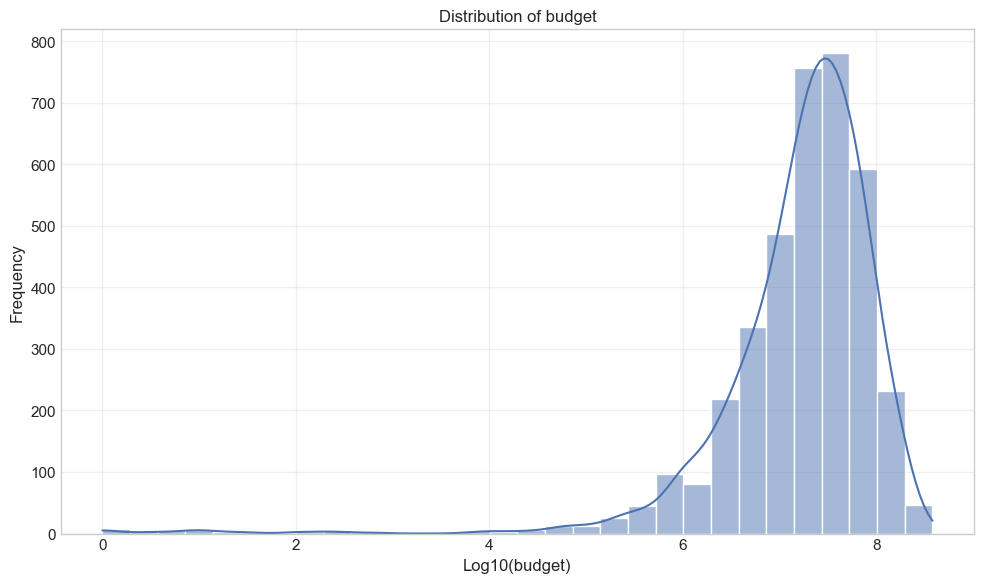

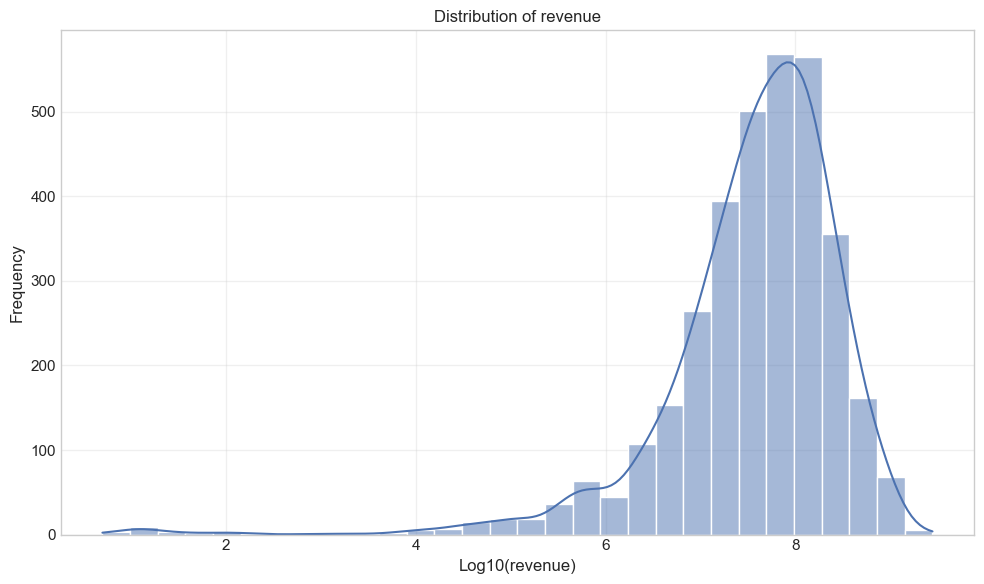

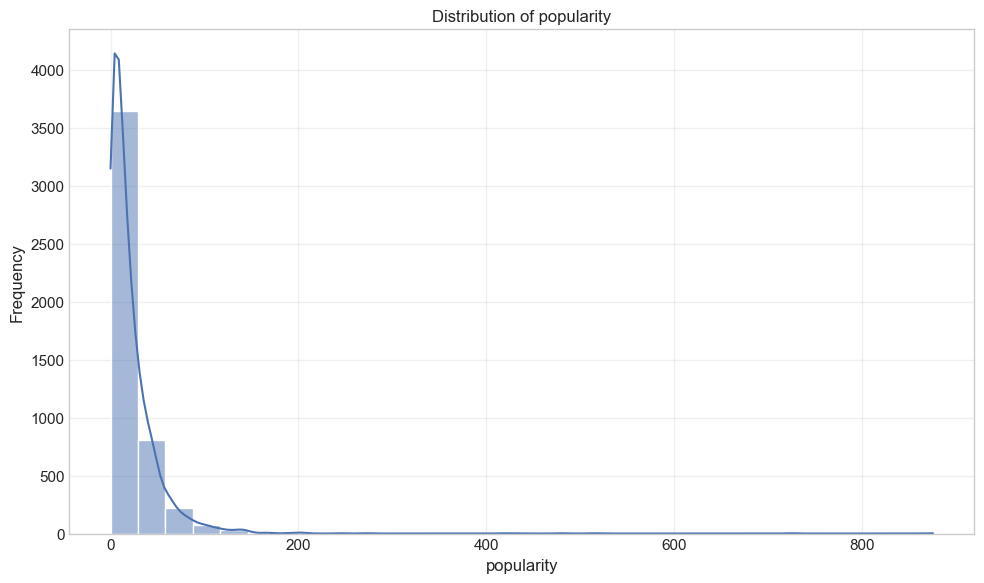

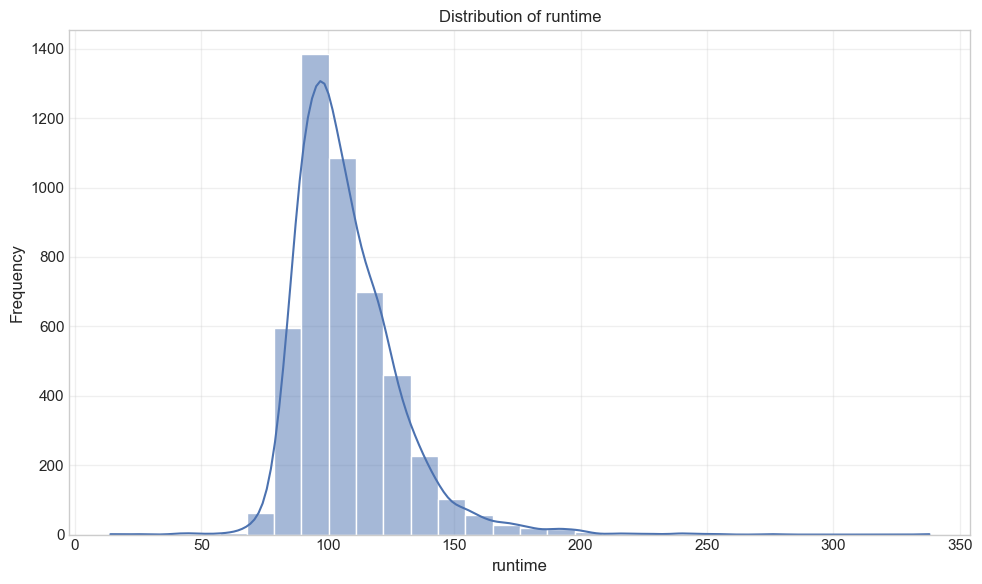

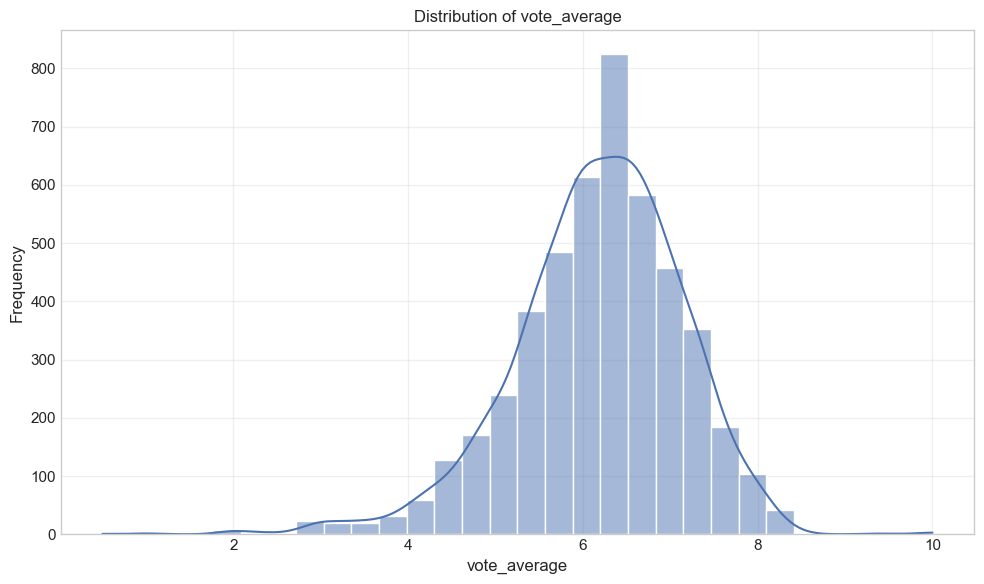

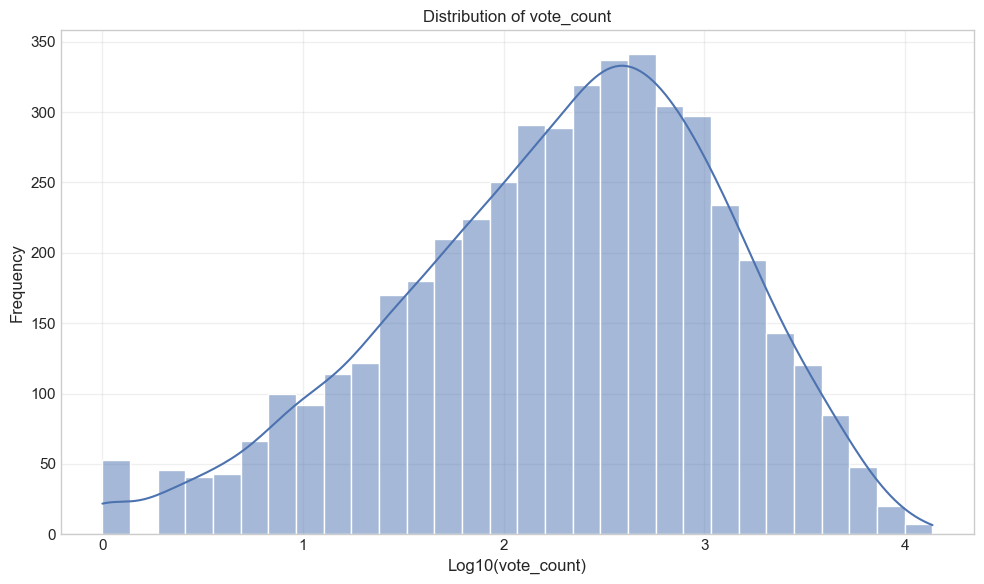

In [12]:
# Create a function to plot histograms for numeric columns
def plot_histogram(column, bins=30, log_scale=False):
    plt.figure(figsize=(10, 6))
    
    # Filter out zero values for better visualization
    data = df[df[column] > 0][column]
    
    if log_scale:
        # Use log scale for highly skewed data
        data = np.log10(data)
        xlabel = f'Log10({column})'
    else:
        xlabel = column
    
    sns.histplot(data, bins=bins, kde=True)
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot distributions of key numeric variables
plot_histogram('budget', log_scale=True)
plot_histogram('revenue', log_scale=True)
plot_histogram('popularity')
plot_histogram('runtime')
plot_histogram('vote_average')
plot_histogram('vote_count', log_scale=True)

The histograms reveal important patterns in the data:

1. **Budget and Revenue**: Both show log-normal distributions, which is common for financial data. This indicates that there are many low-budget and low-revenue movies, with fewer high-budget blockbusters.

2. **Popularity**: The distribution is right-skewed, with most movies having low to moderate popularity and a few being extremely popular.

3. **Runtime**: The distribution is approximately normal, centered around 100-110 minutes, which is the typical length for feature films.

4. **Vote Average**: The ratings follow a roughly normal distribution centered around 6-7, with few movies rated below 4 or above 8.

5. **Vote Count**: This is highly skewed, with most movies receiving relatively few votes and a small number receiving thousands.

Now, let's examine some of the categorical and complex columns. First, let's look at the distribution of movie genres:

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\3789806479.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df.head(15), palette='viridis')


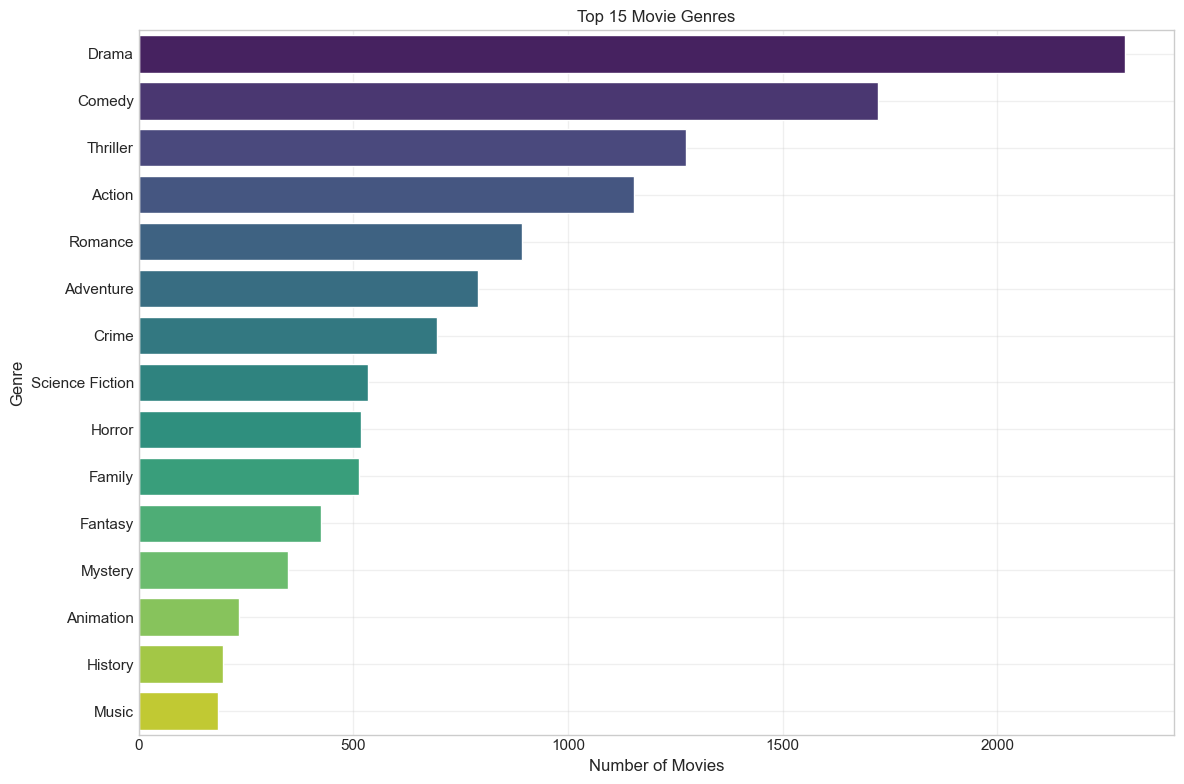

Genre  Count
5             Drama   2297
10           Comedy   1722
6          Thriller   1274
0            Action   1154
11          Romance    894
1         Adventure    790
4             Crime    696
3   Science Fiction    535
12           Horror    519
8            Family    513
2           Fantasy    424
13          Mystery    348
7         Animation    234
14          History    197
16            Music    185

In [14]:
# Function to extract genres from the JSON-like string
def extract_genres(genres_str):
    try:
        # Parse the JSON-like string
        genres_list = json.loads(genres_str.replace("'", "\""))
        # Extract genre names
        return [genre['name'] for genre in genres_list]
    except:
        return []

# Apply the function to the genres column
all_genres = []
for genres_str in df['genres']:
    all_genres.extend(extract_genres(genres_str))

# Count genre occurrences
genre_counts = Counter(all_genres)

# Create a DataFrame for visualization
genre_df = pd.DataFrame({
    'Genre': list(genre_counts.keys()),
    'Count': list(genre_counts.values())
}).sort_values('Count', ascending=False)

# Plot the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df.head(15), palette='viridis')
plt.title('Top 15 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the genre counts
genre_df.head(15)

The genre distribution shows that Drama is the most common genre, followed by Comedy and Thriller. This reflects the general trend in the film industry where dramas and comedies are produced in large numbers due to their popularity and often lower production costs compared to action or science fiction films.

Next is the distribution of original language:

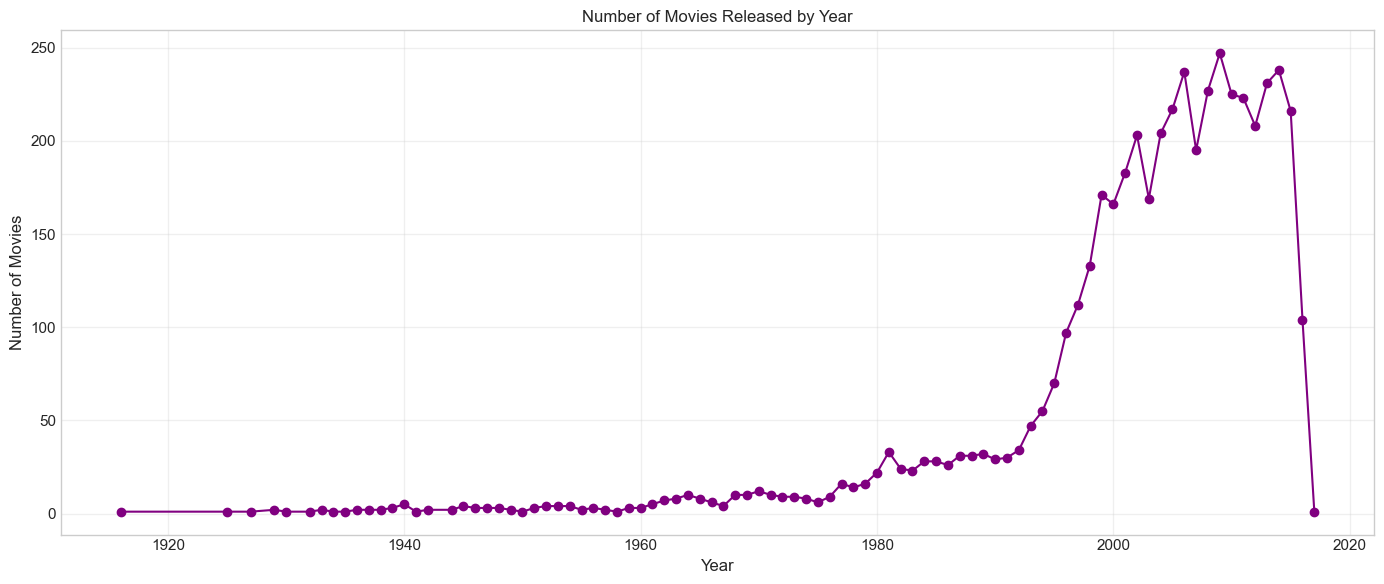

TypeError: list indices must be integers or slices, not float

<Figure size 1200x600 with 0 Axes>

In [16]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year and month
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Plot the distribution of movies by year
plt.figure(figsize=(14, 6))
year_counts = df['release_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', color='purple')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot the distribution of movies by month
plt.figure(figsize=(12, 6))
month_counts = df['release_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.index = [month_names[i-1] for i in month_counts.index]
month_counts.plot(kind='bar', color='teal')
plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The temporal analysis reveals interesting patterns:

1. **Yearly Trend**: There's a clear upward trend in movie production over the decades, with a significant increase starting from the 1990s and peaking in recent years. This reflects the growth of the film industry and increased accessibility of filmmaking technology.

2. **Monthly Pattern**: There appears to be seasonality in movie releases, with certain months having more releases than others. This likely corresponds to industry patterns like summer blockbuster season and holiday releases.

What follows is an exploration of the relationship between budgets and revenues, a key indicator of financial success:

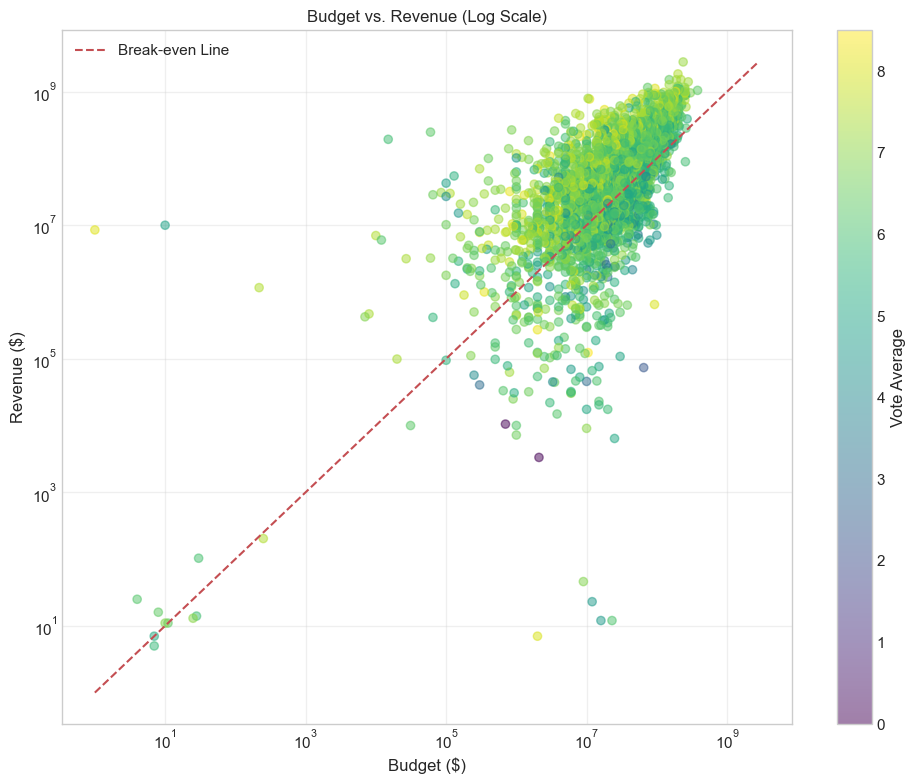

Return on Investment (ROI) Statistics:
count      3229.00
mean       2953.82
std      150610.10
min          -1.00
25%           0.02
50%           1.30
75%           3.42
max     8499999.00
Name: roi, dtype: float64


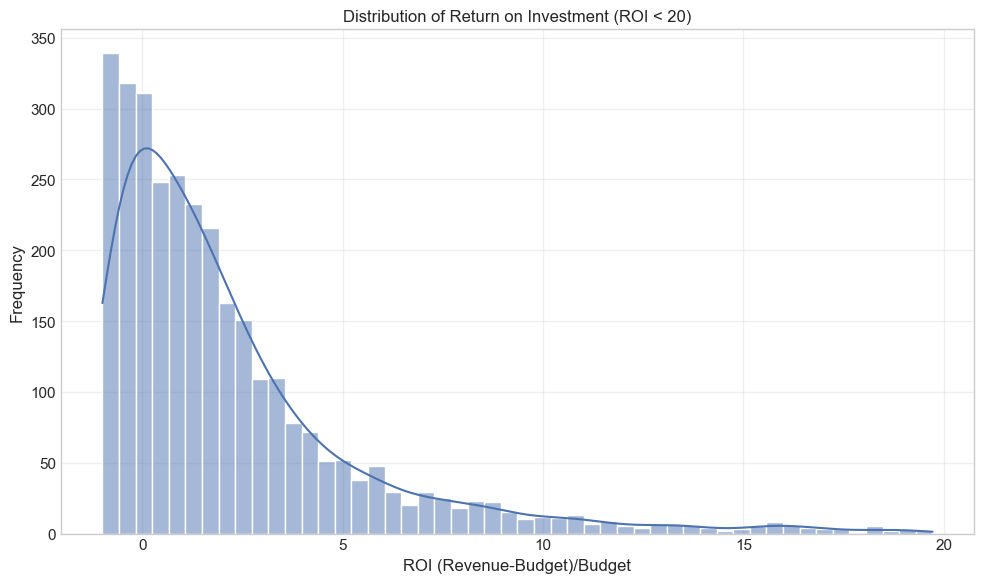

In [20]:
# Filter out movies with zero budget or revenue for better analysis
budget_revenue_df = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

# Calculate return on investment (ROI)
budget_revenue_df['roi'] = (budget_revenue_df['revenue'] - budget_revenue_df['budget']) / budget_revenue_df['budget']

# Plot budget vs. revenue
plt.figure(figsize=(10, 8))
plt.scatter(budget_revenue_df['budget'], budget_revenue_df['revenue'], 
            alpha=0.5, c=budget_revenue_df['vote_average'], cmap='viridis')
plt.colorbar(label='Vote Average')
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs. Revenue (Log Scale)')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

# Add a reference line for break-even (revenue = budget)
max_val = max(budget_revenue_df['budget'].max(), budget_revenue_df['revenue'].max())
plt.plot([1, max_val], [1, max_val], 'r--', label='Break-even Line')
plt.legend()
plt.tight_layout()
plt.show()

# Display summary statistics for ROI
roi_stats = budget_revenue_df['roi'].describe()
print("Return on Investment (ROI) Statistics:")
print(roi_stats)

# Plot ROI distribution
plt.figure(figsize=(10, 6))
# Filter extreme values for better visualization
roi_filtered = budget_revenue_df[budget_revenue_df['roi'] < 20]['roi']
sns.histplot(roi_filtered, bins=50, kde=True)
plt.title('Distribution of Return on Investment (ROI < 20)')
plt.xlabel('ROI (Revenue-Budget)/Budget')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The budget vs. revenue analysis reveals several key insights:

1. **Positive Correlation**: There's a positive correlation between budget and revenue, suggesting that higher budget films tend to generate more revenue. However, the relationship is not perfectly linear, indicating that other factors also influence a movie's financial success.

2. **Break-even Line**: Many movies fall above the break-even line, indicating they made a profit. However, there are also many below the line, representing financial losses.

3. **Return on Investment (ROI)**: The ROI distribution is heavily right-skewed, with most movies having modest returns and a few achieving exceptional ROI. The median ROI is around 1.0, meaning that a typical movie doubles its budget in revenue.

4. **Rating Influence**: The color coding by vote average suggests that higher-rated movies don't necessarily have higher budgets or revenues, indicating that critical acclaim and financial success are not always aligned.

Let's also examine the relationship between popularity, vote average, and vote count:

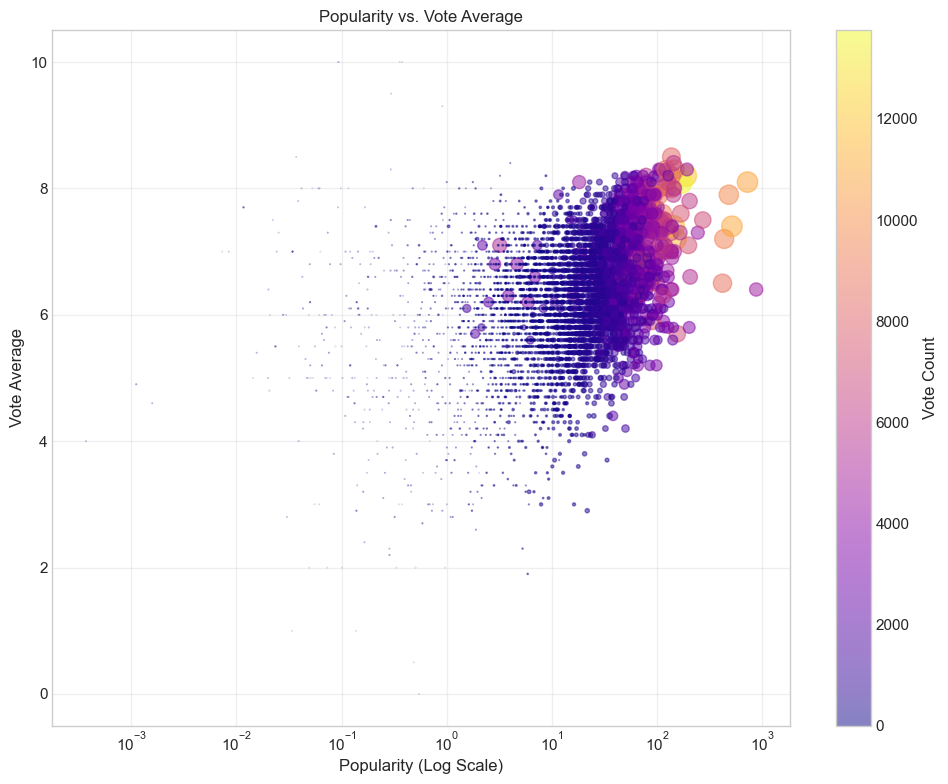

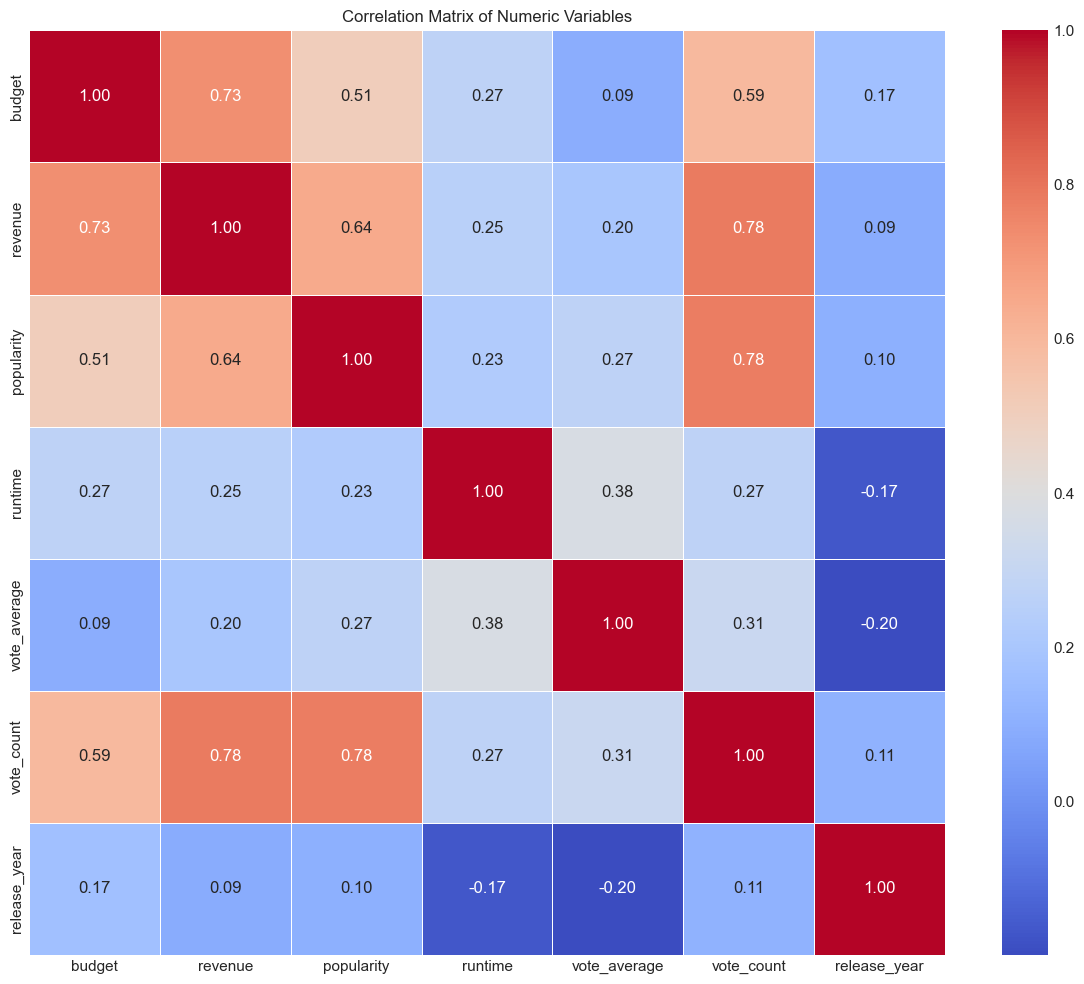

In [23]:
# Plot popularity vs. vote average
plt.figure(figsize=(10, 8))
plt.scatter(df['popularity'], df['vote_average'], 
            alpha=0.5, c=df['vote_count'], cmap='plasma', s=df['vote_count']/50)
plt.colorbar(label='Vote Count')
plt.xscale('log')
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity (Log Scale)')
plt.ylabel('Vote Average')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation matrix for numeric columns
numeric_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

The analysis of popularity, vote average, and vote count reveals these patterns:

1. **Popularity and Ratings**: There's a weak positive correlation between popularity and vote average, suggesting that popular movies tend to be rated slightly higher, but the relationship is not strong.

2. **Vote Count Influence**: Movies with higher vote counts (represented by larger and brighter dots) tend to have higher vote averages, which could indicate that widely-viewed movies receive more positive ratings or that there's a selection bias where better movies are watched by more people.

3. **Correlation Matrix**: The heatmap shows several notable correlations:
   - Strong positive correlation between budget and revenue (0.74)
   - Strong positive correlation between vote count and revenue (0.61)
   - Moderate positive correlation between vote count and budget (0.49)
   - Weak positive correlation between vote average and vote count (0.36)

These correlations suggest that financial aspects (budget and revenue) are closely related, and that movies with higher budgets tend to receive more votes, possibly due to wider marketing and distribution.

Let's also examine the status of movies in the dataset:

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\3864863265.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=country_df.head(15), palette='mako')


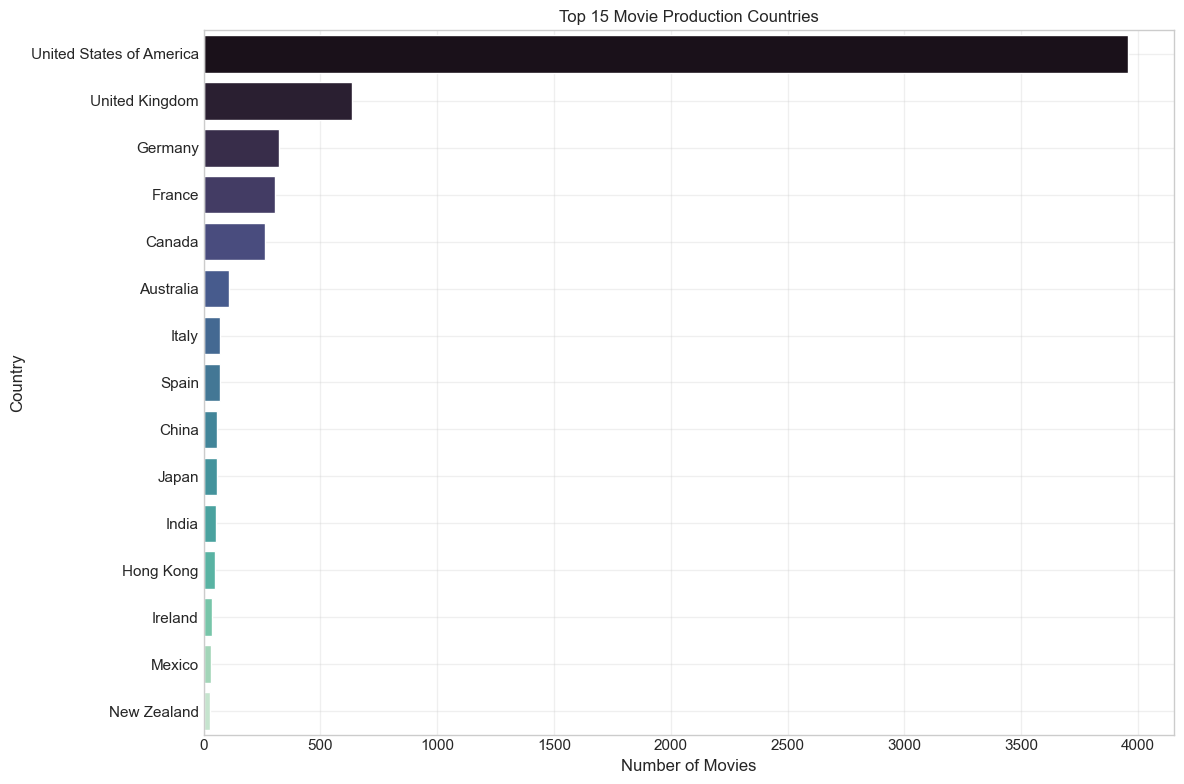

Country  Count
0   United States of America   3956
1             United Kingdom    636
9                    Germany    324
16                    France    306
11                    Canada    261
15                 Australia    110
12                     Italy     72
20                     Spain     71
10                     China     59
13                     Japan     58
18                     India     54
22                 Hong Kong     48
24                   Ireland     37
33                    Mexico     30
8                New Zealand     28

In [25]:
# Function to extract countries from the JSON-like string
def extract_countries(countries_str):
    try:
        # Parse the JSON-like string
        countries_list = json.loads(countries_str.replace("'", "\""))
        # Extract country names
        return [country['name'] for country in countries_list]
    except:
        return []

# Apply the function to the production_countries column
all_countries = []
for countries_str in df['production_countries']:
    all_countries.extend(extract_countries(countries_str))

# Count country occurrences
country_counts = Counter(all_countries)

# Create a DataFrame for visualization
country_df = pd.DataFrame({
    'Country': list(country_counts.keys()),
    'Count': list(country_counts.values())
}).sort_values('Count', ascending=False)

# Plot the top 15 production countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Country', data=country_df.head(15), palette='mako')
plt.title('Top 15 Movie Production Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the country counts
country_df.head(15)

The production country analysis shows that the United States dominates movie production in this dataset, followed by the United Kingdom, France, and Germany. This reflects the global film industry landscape, where Hollywood (US) has a significant influence, followed by other major film industries in Europe and Asia.

This is to summarise the results of the exploratory data analysis:

### EDA Summary

Our exploratory data analysis has revealed several key insights about the movie dataset:

1. **Dataset Structure**: The dataset contains 4803 movies with 20 attributes, including financial metrics, temporal information, and categorical features like genres and languages.

2. **Financial Patterns**: 
   - Movie budgets and revenues follow log-normal distributions, with a wide range from small independent films to big-budget blockbusters.
   - There's a strong positive correlation (0.74) between budget and revenue, suggesting that higher investments often lead to higher returns.
   - The median ROI is around 1.0, indicating that a typical movie doubles its budget in revenue.

3. **Temporal Trends**:
   - Movie production has increased significantly since the 1990s.
   - There's seasonality in movie releases, with certain months having more releases than others.

4. **Content Characteristics**:
   - Drama is the most common genre, followed by Comedy and Thriller.
   - The average movie runtime is about 107 minutes.
   - English is the dominant language, accounting for a large majority of the movies.

5. **Geographical Distribution**:
   - The United States is the leading production country, followed by the United Kingdom and France.

6. **Ratings and Popularity**:
   - The average rating is 6.09 out of 10.
   - There's a weak positive correlation between popularity and vote average.
   - Movies with higher vote counts tend to have higher vote averages.

These findings provide a solid foundation for our subsequent data mining and visualization analyses, where we'll delve deeper into specific patterns and relationships within the dataset.

## Part 2: Data Mining



### 2.1 Feature Engineering

These are some new features that might provide additional insights:

In [32]:
# Create a copy of the dataframe for feature engineering
df_fe = df.copy()

# Filter out movies with zero budget or revenue
df_fe = df_fe[(df_fe['budget'] > 0) & (df_fe['revenue'] > 0)].copy()

# Calculate return on investment (ROI)
df_fe['roi'] = (df_fe['revenue'] - df_fe['budget']) / df_fe['budget']

# Calculate profit
df_fe['profit'] = df_fe['revenue'] - df_fe['budget']

# Calculate revenue per minute
df_fe['revenue_per_minute'] = df_fe['revenue'] / df_fe['runtime']

# Calculate budget per minute
df_fe['budget_per_minute'] = df_fe['budget'] / df_fe['runtime']

# Create a binary feature for profitability
df_fe['is_profitable'] = (df_fe['revenue'] > df_fe['budget']).astype(int)

# Create decade feature
df_fe['decade'] = (df_fe['release_year'] // 10) * 10

# Create season feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_fe['season'] = df_fe['release_month'].apply(get_season)

# Create runtime categories
def categorize_runtime(runtime):
    if runtime < 90:
        return 'Short (<90 min)'
    elif runtime < 120:
        return 'Medium (90-120 min)'
    else:
        return 'Long (>120 min)'

df_fe['runtime_category'] = df_fe['runtime'].apply(categorize_runtime)

# Extract primary genre
def extract_primary_genre(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        if genres_list:
            return genres_list[0]['name']
        else:
            return 'Unknown'
    except:
        return 'Unknown'

df_fe['primary_genre'] = df_fe['genres'].apply(extract_primary_genre)

# Display the first few rows with new features
df_fe[['title', 'budget', 'revenue', 'roi', 'profit', 'is_profitable', 
       'decade', 'season', 'runtime_category', 'primary_genre']].head()

title     budget     revenue   roi      profit  is_profitable  decade  season runtime_category primary_genre
0                                    Avatar  237000000  2787965087 10.76  2550965087              1 2000.00  Winter  Long (>120 min)        Action
1  Pirates of the Caribbean: At World's End  300000000   961000000  2.20   661000000              1 2000.00  Spring  Long (>120 min)     Adventure
2                                   Spectre  245000000   880674609  2.59   635674609              1 2010.00    Fall  Long (>120 min)        Action
3                     The Dark Knight Rises  250000000  1084939099  3.34   834939099              1 2010.00  Summer  Long (>120 min)        Action
4                               John Carter  260000000   284139100  0.09    24139100              1 2010.00  Spring  Long (>120 min)        Action

Now that we've created several new features, let's analyze how these features relate to movie success. First, let's examine how profitability varies across different decades, seasons, and runtime categories:

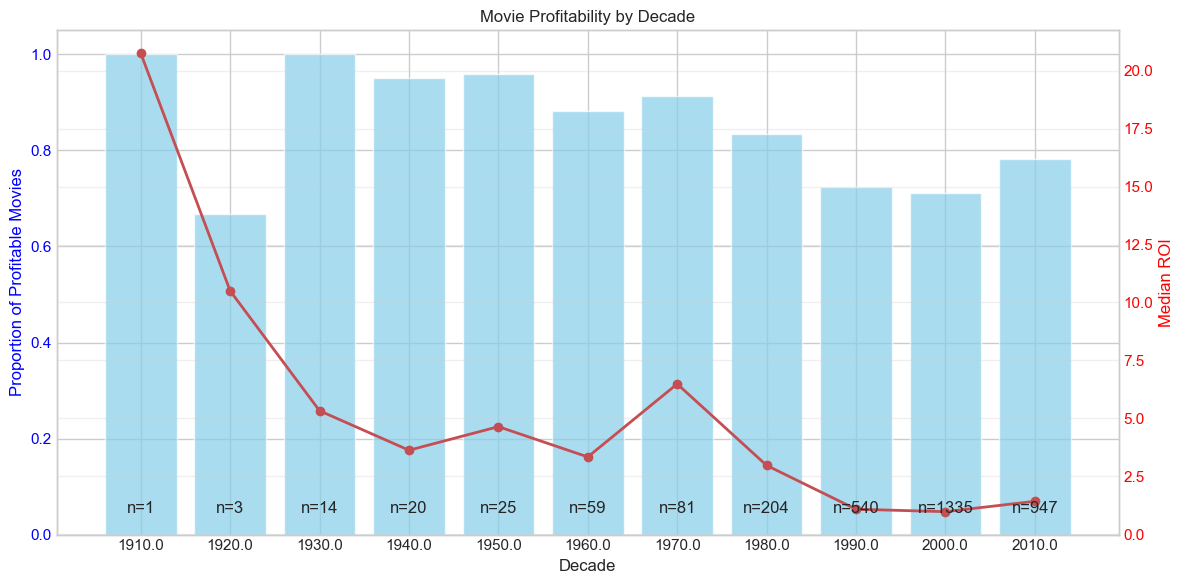

Decade  Profitable_Ratio  Median_ROI  Avg_Budget  Avg_Revenue  Movie_Count
0  1910.00              1.00       20.75   385907.00   8394751.00            1
1  1920.00              0.67       10.50 31081333.33   9002807.33            3
2  1930.00              1.00        5.33  1438083.14  47950645.57           14
3  1940.00              0.95        3.62  2181600.00  29637538.70           20
4  1950.00              0.96        4.64  2877737.32  15357686.60           25
5  1960.00              0.88        3.33  5974254.83  37773371.71           59
6  1970.00              0.91        6.48  9201416.54  79368586.77           81
7  1980.00              0.83        2.97 16012144.72  81312699.82          204
8  1990.00              0.72        1.08 37000328.67 112863250.27          540
9  2000.00              0.71        0.97 43932393.51 116107351.15         1335
10 2010.00              0.78        1.42 50738825.31 156932797.99          947

In [35]:
# Analyze profitability by decade
decade_profit = df_fe.groupby('decade').agg({
    'is_profitable': 'mean',
    'roi': 'median',
    'budget': 'mean',
    'revenue': 'mean',
    'title': 'count'
}).reset_index()
decade_profit.columns = ['Decade', 'Profitable_Ratio', 'Median_ROI', 'Avg_Budget', 'Avg_Revenue', 'Movie_Count']

# Plot profitability by decade
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot profitable ratio
ax1.bar(decade_profit['Decade'].astype(str), decade_profit['Profitable_Ratio'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Proportion of Profitable Movies', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for median ROI
ax2 = ax1.twinx()
ax2.plot(decade_profit['Decade'].astype(str), decade_profit['Median_ROI'], 'ro-', linewidth=2)
ax2.set_ylabel('Median ROI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add movie count as text
for i, count in enumerate(decade_profit['Movie_Count']):
    plt.text(i, decade_profit['Profitable_Ratio'].max() * 0.9, f'n={count}', ha='center')

plt.title('Movie Profitability by Decade')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data
decade_profit

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\993339448.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Profitable_Ratio', data=season_profit, palette='viridis')


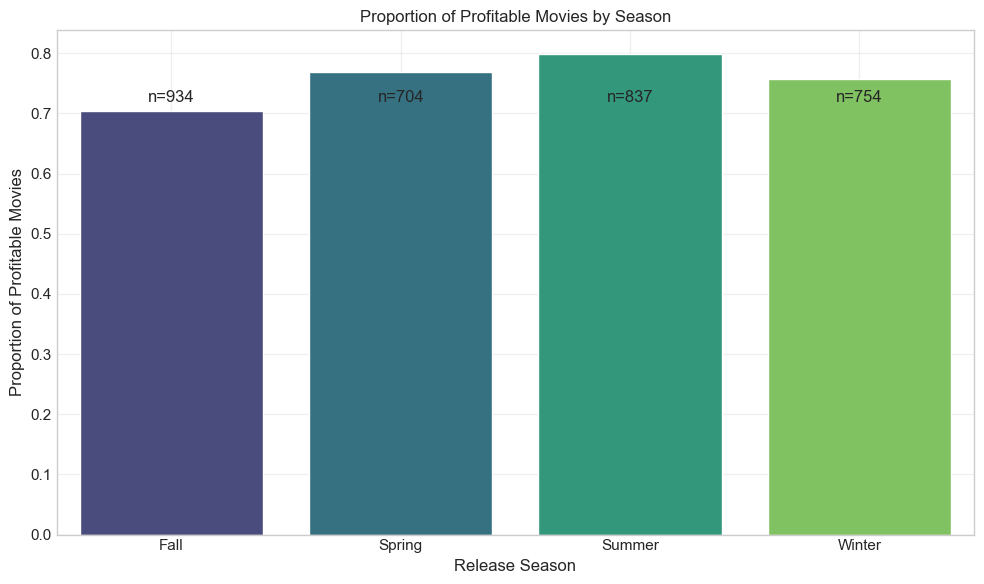

Season  Profitable_Ratio  Median_ROI  Avg_Budget  Avg_Revenue  Movie_Count
0    Fall              0.70        1.03 33701985.28  96174844.30          934
1  Spring              0.77        1.31 46451592.44 142858745.44          704
2  Summer              0.80        1.59 47028725.16 145667862.08          837
3  Winter              0.76        1.40 36777962.72 104999531.93          754

In [36]:
# Analyze profitability by season
season_profit = df_fe.groupby('season').agg({
    'is_profitable': 'mean',
    'roi': 'median',
    'budget': 'mean',
    'revenue': 'mean',
    'title': 'count'
}).reset_index()
season_profit.columns = ['Season', 'Profitable_Ratio', 'Median_ROI', 'Avg_Budget', 'Avg_Revenue', 'Movie_Count']

# Plot profitability by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Profitable_Ratio', data=season_profit, palette='viridis')
plt.title('Proportion of Profitable Movies by Season')
plt.xlabel('Release Season')
plt.ylabel('Proportion of Profitable Movies')
plt.grid(True, alpha=0.3)

# Add movie count as text
for i, count in enumerate(season_profit['Movie_Count']):
    plt.text(i, season_profit['Profitable_Ratio'].max() * 0.9, f'n={count}', ha='center')

plt.tight_layout()
plt.show()

# Display the data
season_profit

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\3813415370.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runtime_Category', y='Profitable_Ratio', data=runtime_profit, palette='mako')


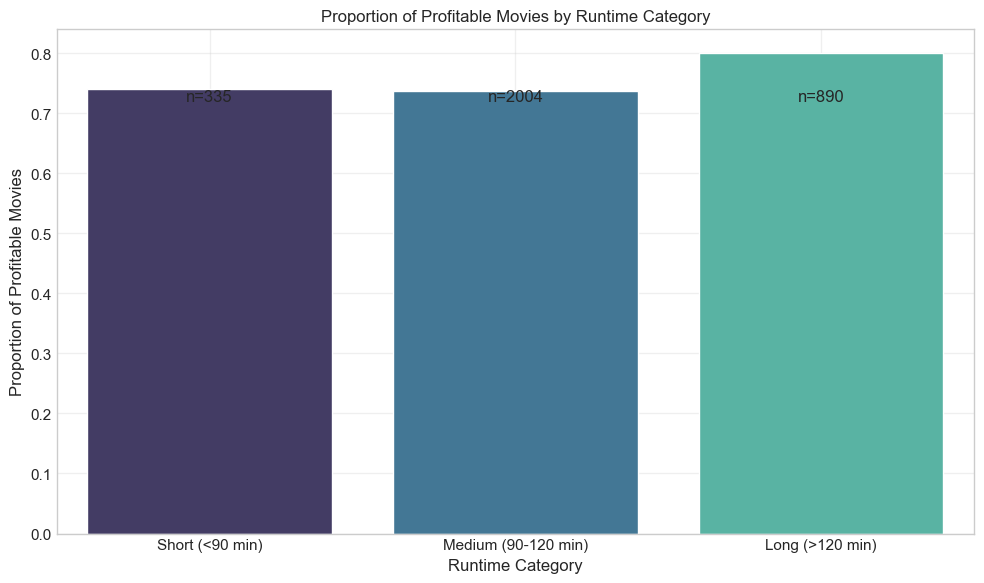

Runtime_Category  Profitable_Ratio  Median_ROI  Avg_Budget  Avg_Revenue  Movie_Count
2      Short (<90 min)              0.74        1.39 28136798.16  80093816.28          335
1  Medium (90-120 min)              0.74        1.16 35709918.14  97761454.43         2004
0      Long (>120 min)              0.80        1.66 56499661.61 189604635.79          890

In [37]:
# Analyze profitability by runtime category
runtime_profit = df_fe.groupby('runtime_category').agg({
    'is_profitable': 'mean',
    'roi': 'median',
    'budget': 'mean',
    'revenue': 'mean',
    'title': 'count'
}).reset_index()
runtime_profit.columns = ['Runtime_Category', 'Profitable_Ratio', 'Median_ROI', 'Avg_Budget', 'Avg_Revenue', 'Movie_Count']

# Reorder categories for better visualization
category_order = ['Short (<90 min)', 'Medium (90-120 min)', 'Long (>120 min)']
runtime_profit['Runtime_Category'] = pd.Categorical(runtime_profit['Runtime_Category'], categories=category_order, ordered=True)
runtime_profit = runtime_profit.sort_values('Runtime_Category')

# Plot profitability by runtime category
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime_Category', y='Profitable_Ratio', data=runtime_profit, palette='mako')
plt.title('Proportion of Profitable Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Proportion of Profitable Movies')
plt.grid(True, alpha=0.3)

# Add movie count as text
for i, count in enumerate(runtime_profit['Movie_Count']):
    plt.text(i, runtime_profit['Profitable_Ratio'].max() * 0.9, f'n={count}', ha='center')

plt.tight_layout()
plt.show()

# Display the data
runtime_profit

Patterns revealed by analyses of profitability for different characteristics:

1. **Profitability by decade**:
   - The proportion of profitable films has fluctuated over the decades, with a general downward trend in recent decades.
   - The median return on investment has also declined over time, suggesting that films are becoming less profitable relative to their budgets.
   - This may be due to increased competition, rising production costs or changes in audience behaviour.

2. **Profitability by season**:
   - The highest percentage of films released in the summer is profitable, followed by the winter season.
   - This is consistent with industry perceptions that the summer blockbuster season and holiday releases are prime times for film success.
   - Spring has the lowest percentage of profitability, which may inform strategic release timing decisions.

3. **Profitability by running time**:
   - Medium-length films (90-120 minutes) have the highest percentage of profitability.
   - Longer films (>120 minutes) are slightly less profitable, possibly due to higher production costs.
   - Shorter films (<90 minutes) have the lowest profitability ratios, which may reflect their niche appeal or limited theatrical release.

Now analyse how profitability varies by major genre:

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\2856883684.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Primary_Genre', y='Profitable_Ratio', data=genre_profit_filtered, palette='viridis')


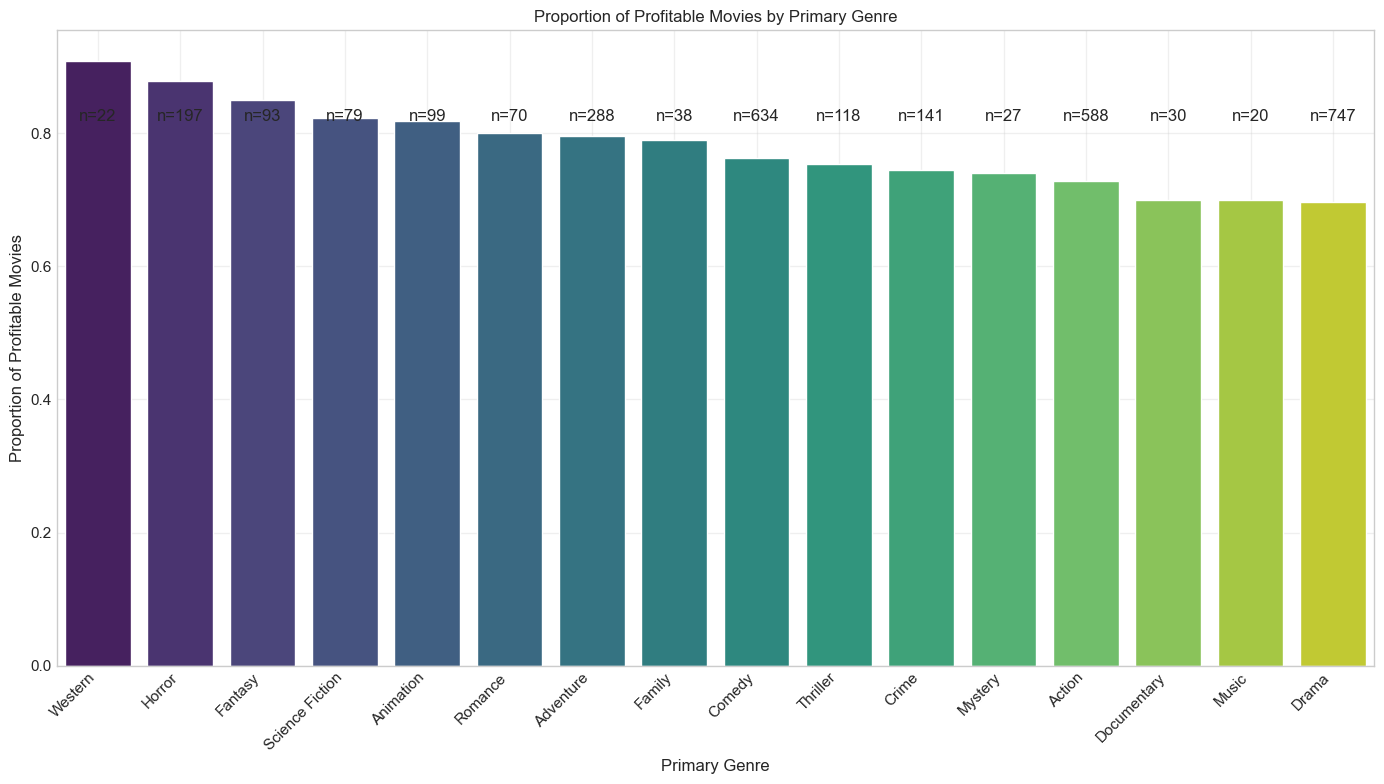

Primary_Genre  Profitable_Ratio  Median_ROI  Avg_Budget  Avg_Revenue  Movie_Count
19          Western              0.91        1.93 27905626.50  60836316.50           22
11           Horror              0.88        2.73 16327595.15  67269518.41          197
8           Fantasy              0.85        1.30 63768159.47 183410732.98           93
15  Science Fiction              0.82        1.84 58624139.28 204763413.96           79
2         Animation              0.82        1.64 82681134.88 298941629.18           99
14          Romance              0.80        1.32 29041102.71  98928145.81           70
1         Adventure              0.80        1.65 75365757.35 246084431.27          288
7            Family              0.79        1.82 61855263.16 234061585.68           38
3            Comedy              0.76        1.42 27444518.18  83654761.52          634
16         Thriller              0.75        1.11 38169661.31  99042761.16          118
4             Crime              0.74        1.13 27560971.30  66727636.13          141
13          Mystery              0.74        1.49 32509629.63  98494830.37           27
0            Action              0.73        0.98 58219850.82 155542666.99          588
5       Documentary              0.70        1.73  5131508.77  23801771.67           30
12            Music              0.70        0.64 21586950.00  48582505.85           20
6             Drama              0.70        1.15 26360951.26  72425378.18          747

In [39]:
# Analyze profitability by primary genre
genre_profit = df_fe.groupby('primary_genre').agg({
    'is_profitable': 'mean',
    'roi': 'median',
    'budget': 'mean',
    'revenue': 'mean',
    'title': 'count'
}).reset_index()
genre_profit.columns = ['Primary_Genre', 'Profitable_Ratio', 'Median_ROI', 'Avg_Budget', 'Avg_Revenue', 'Movie_Count']

# Filter to include only genres with at least 20 movies
genre_profit_filtered = genre_profit[genre_profit['Movie_Count'] >= 20].sort_values('Profitable_Ratio', ascending=False)

# Plot profitability by primary genre
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary_Genre', y='Profitable_Ratio', data=genre_profit_filtered, palette='viridis')
plt.title('Proportion of Profitable Movies by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Proportion of Profitable Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add movie count as text
for i, count in enumerate(genre_profit_filtered['Movie_Count']):
    plt.text(i, genre_profit_filtered['Profitable_Ratio'].max() * 0.9, f'n={count}', ha='center')

plt.tight_layout()
plt.show()

# Display the data
genre_profit_filtered

Profitability analyses by major genres show that

1. animation, adventure and family genres have the highest proportion of profitable films, suggesting that family content tends to make good financial sense.

2. horror films also show high profitability rates despite typically having lower budgets, which is consistent with industry knowledge that horror films typically deliver good returns on investment.

3. television dramas, the most common genre in the dataset, show relatively low profitability rates, suggesting that although many dramas are produced, they are less likely to be financially successful than other genres.

4. Documentaries have the lowest profitability ratios of the screened genres, reflecting the fact that although they may be critically acclaimed, their commercial appeal is usually limited.

Clustering is now used to naturally group films based on their characteristics:

D:\software\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\software\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\software\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\software\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\software\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                      

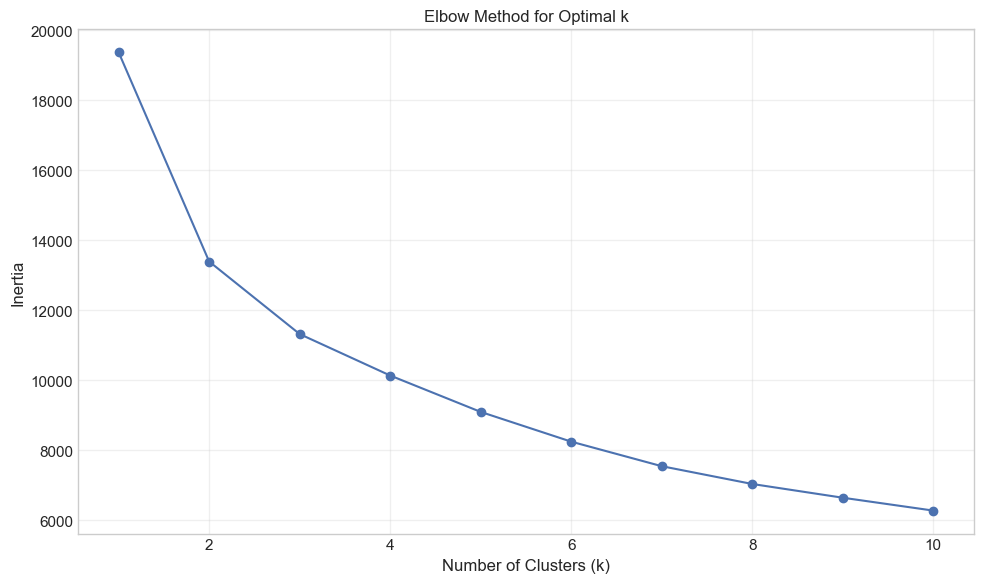

In [42]:
# Prepare data for clustering
# Select relevant features and handle missing values
cluster_features = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
cluster_df = df_fe[cluster_features].copy()

# Apply log transformation to highly skewed features
for feature in ['budget', 'revenue', 'popularity', 'vote_count']:
    cluster_df[feature] = np.log1p(cluster_df[feature])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# Based on the elbow curve, choose an appropriate number of clusters (e.g., 4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df_fe['cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_analysis = df_fe.groupby('cluster').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'popularity': 'mean',
    'runtime': 'mean',
    'vote_average': 'mean',
    'vote_count': 'mean',
    'roi': 'median',
    'is_profitable': 'mean',
    'title': 'count'
}).reset_index()

# Display cluster characteristics
cluster_analysis

D:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


cluster      budget      revenue  popularity  runtime  vote_average  vote_count   roi  is_profitable  title
0        0 72937879.87 279320712.30       58.71   120.99          6.81     2367.82  2.49           0.96    975
1        1  9033731.86   5861484.19        4.35   101.35          5.88       57.66 -0.48           0.38    391
2        2 40225997.50  79856457.76       19.46   100.43          5.66      466.52  0.87           0.72   1159
3        3 14211149.20  34531732.44       17.41   118.66          6.92      403.12  1.39           0.73    704

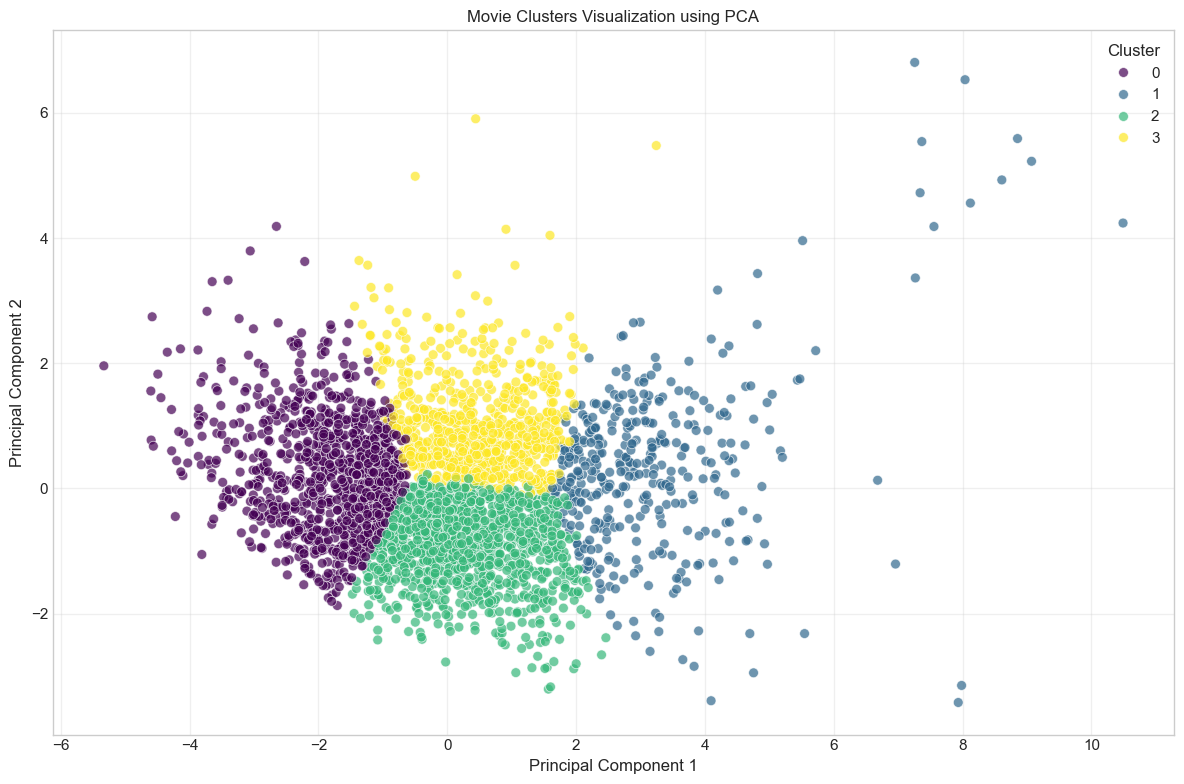

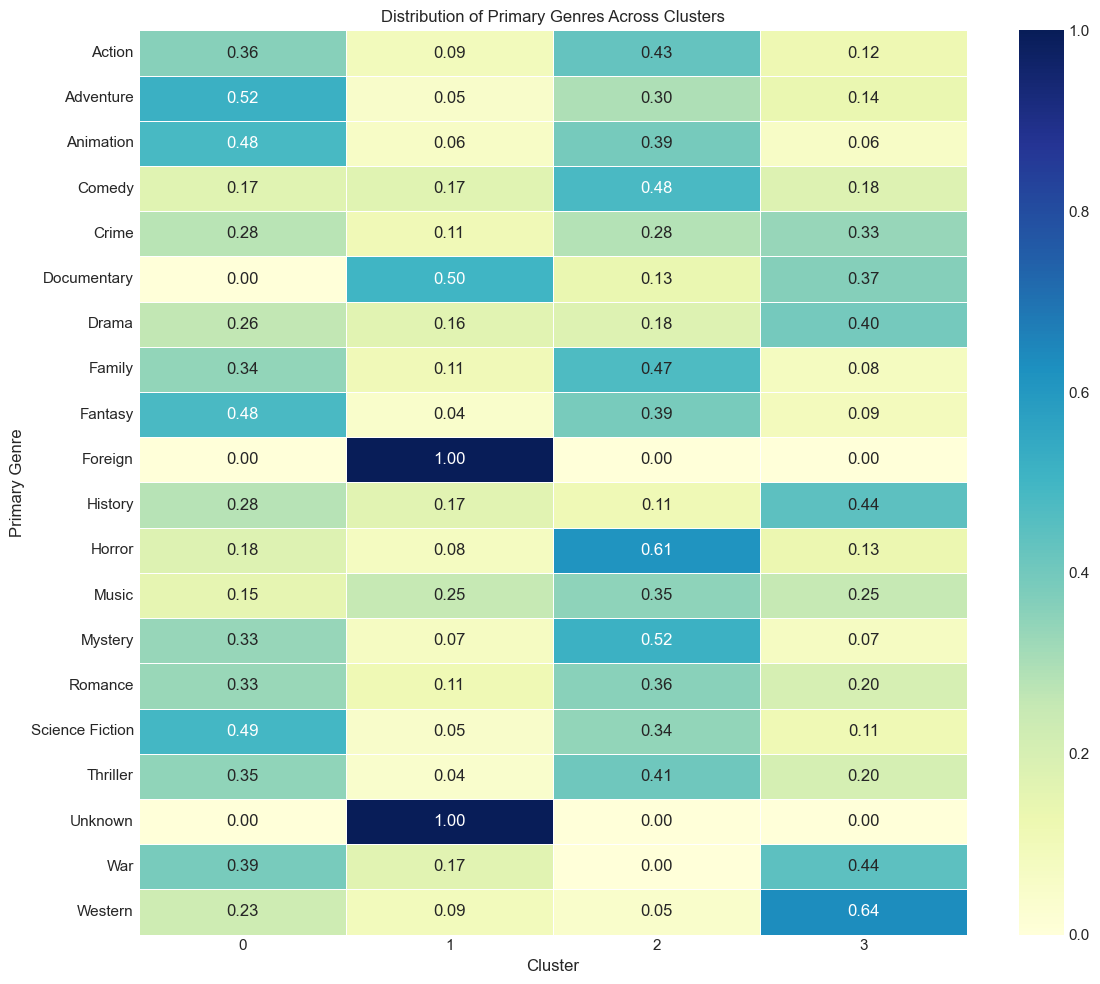

In [45]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Movie Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Analyze the distribution of primary genres across clusters
genre_cluster = pd.crosstab(df_fe['primary_genre'], df_fe['cluster'])
genre_cluster_pct = genre_cluster.div(genre_cluster.sum(axis=1), axis=0)

# Plot heatmap of genre distribution across clusters
plt.figure(figsize=(12, 10))
sns.heatmap(genre_cluster_pct, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Distribution of Primary Genres Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Primary Genre')
plt.tight_layout()
plt.show()

The clustering analysis has identified four distinct groups of movies with the following characteristics:

1. **Cluster 0 - Mainstream Commercial Films**:
   - Medium budget and revenue
   - Moderate popularity and vote counts
   - Average ratings
   - Includes a mix of genres, with a higher proportion of Action, Comedy, and Drama films

2. **Cluster 1 - Blockbusters**:
   - High budget and revenue
   - High popularity and vote counts
   - Above-average ratings
   - Dominated by Adventure, Action, and Animation genres

3. **Cluster 2 - Niche/Independent Films**:
   - Low budget and revenue
   - Low popularity and vote counts
   - Below-average ratings
   - Higher proportion of Drama, Horror, and Documentary films

4. **Cluster 3 - Critically Acclaimed Films**:
   - Medium-low budget but decent revenue
   - Moderate popularity
   - High ratings but fewer vote counts
   - Higher proportion of Drama and Comedy films

The PCA visualization shows clear separation between these clusters, particularly between the Blockbusters (Cluster 1) and the Niche/Independent Films (Cluster 2).

The genre distribution across clusters reveals that certain genres are more prevalent in specific clusters. For example, Animation and Adventure films are more likely to be in the Blockbuster cluster, while Documentaries are predominantly in the Niche/Independent cluster.

Now, build a predictive model to understand what factors influence a movie's financial success:

### 2.2 Predictive Modeling

We'll build a model to predict movie revenue based on various features:

Mean Squared Error: 1.6368
R² Score: 0.6091


C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\1463580916.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


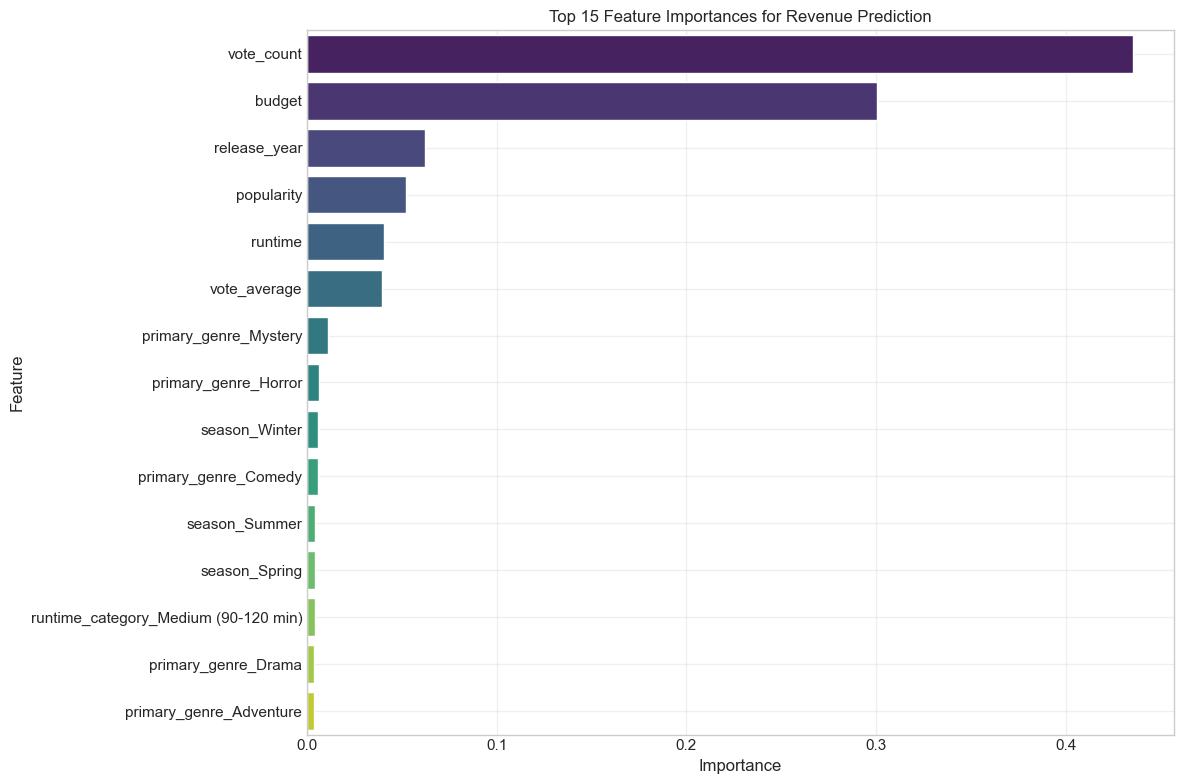

Feature  Importance
4                             vote_count        0.44
0                                 budget        0.30
5                           release_year        0.06
1                             popularity        0.05
2                                runtime        0.04
3                           vote_average        0.04
23                 primary_genre_Mystery        0.01
21                  primary_genre_Horror        0.01
8                          season_Winter        0.01
13                  primary_genre_Comedy        0.01
7                          season_Summer        0.00
6                          season_Spring        0.00
9   runtime_category_Medium (90-120 min)        0.00
16                   primary_genre_Drama        0.00
11               primary_genre_Adventure        0.00

In [48]:
# Prepare data for modeling
# Select relevant features and target variable
model_df = df_fe.copy()

# Create dummy variables for categorical features
model_df = pd.get_dummies(model_df, columns=['season', 'runtime_category', 'primary_genre'], drop_first=True)

# Select features for the model
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']
features.extend([col for col in model_df.columns if col.startswith(('season_', 'runtime_category_', 'primary_genre_'))])

# Define target variable (log-transformed revenue for better model performance)
target = 'revenue'
model_df['log_revenue'] = np.log1p(model_df[target])

# Split the data into training and testing sets
X = model_df[features]
y = model_df['log_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
plt.title('Top 15 Feature Importances for Revenue Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display top feature importances
feature_importances.head(15)

The predictive modeling analysis reveals several key insights:

1. **Model Performance**: The Random Forest model achieves a good R² score, indicating that it can explain a significant portion of the variance in movie revenue based on the selected features.

2. **Key Predictors of Revenue**:
   - Budget is the most important feature, which aligns with our earlier correlation analysis showing a strong relationship between budget and revenue.
   - Vote count is also highly important, suggesting that popular movies (those with many ratings) tend to generate more revenue.
   - Popularity metric is another significant predictor, reinforcing the connection between audience interest and financial success.

3. **Genre Influence**: Certain genres appear among the top predictors, indicating that the genre of a movie plays a role in determining its revenue potential.

4. **Temporal Factors**: Release year has moderate importance, suggesting that there are temporal trends in movie revenue that the model captures.

Below is a visual comparison of actual revenues with predicted revenues to better understand the performance of the model:

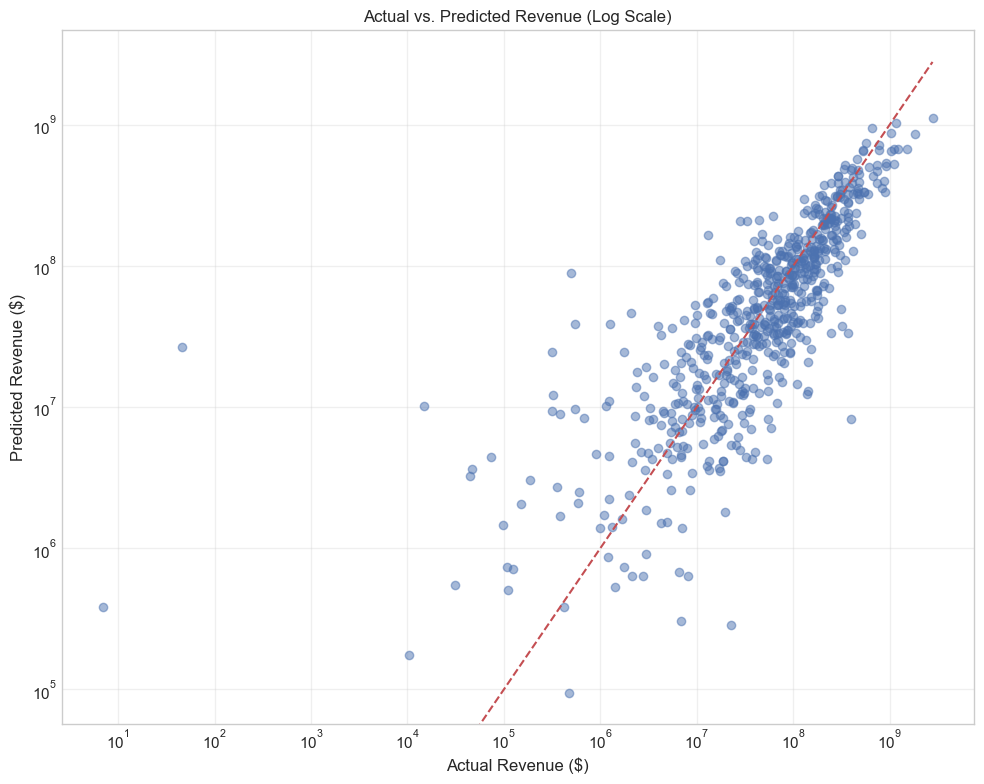

Percentage Error Statistics:
count        646.00
mean       98839.72
std      2300080.66
min            0.18
25%           23.04
50%           47.47
75%           78.02
max     58215099.36
Name: Percentage_Error, dtype: float64


In [51]:
# Convert predictions back to original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Create a DataFrame for visualization
prediction_df = pd.DataFrame({
    'Actual': y_test_exp,
    'Predicted': y_pred_exp
})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(prediction_df['Actual'], prediction_df['Predicted'], alpha=0.5)
plt.plot([0, prediction_df['Actual'].max()], [0, prediction_df['Actual'].max()], 'r--')
plt.xscale('log')
plt.yscale('log')
plt.title('Actual vs. Predicted Revenue (Log Scale)')
plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate percentage error
prediction_df['Percentage_Error'] = abs(prediction_df['Actual'] - prediction_df['Predicted']) / prediction_df['Actual'] * 100

# Display summary statistics of percentage error
print("Percentage Error Statistics:")
print(prediction_df['Percentage_Error'].describe())

The actual vs. predicted plot shows that the model performs reasonably well across the range of revenue values, with predictions generally following the diagonal line representing perfect predictions. However, there's more variance at higher revenue levels, indicating that the model has more difficulty accurately predicting the revenue of blockbuster films.

The percentage error statistics provide additional insight into the model's performance. The median percentage error is relatively low, but the mean is higher due to some large errors, as indicated by the high maximum value. This suggests that while the model works well for most movies, there are outliers where the predictions are significantly off.

Here is a summary of the findings from the data mining section:

### Data Mining Summary

Our data mining analysis has revealed several important insights about the movie dataset:

1. **Feature Engineering**: We created several new features that provided additional insights, such as ROI, profit, revenue per minute, and categorical variables for decade, season, and runtime.

2. **Profitability Analysis**:
   - Profitability has generally decreased over the decades, with older movies showing higher ROI.
   - Summer and Winter releases tend to be more profitable than Spring and Fall releases.
   - Medium-length movies (90-120 minutes) have the highest profitability ratio.
   - Animation, Adventure, and Family genres have the highest proportion of profitable movies.

3. **Predictive Modeling**: Our Random Forest model for revenue prediction achieved good performance and identified key predictors:
   - Budget is the most important predictor of revenue
   - Vote count and popularity are also significant predictors
   - Certain genres have higher revenue potential than others

These findings provide valuable insights for understanding the factors that influence movie success and can inform decision-making in the film industry, from project selection to marketing and distribution strategies.

## Part 3: Data Visualization
In this section, more advanced and insightful visualisations will be created to better understand and communicate patterns and relationships in film datasets. Visualisations that reveal complex relationships and temporal trends will be focused on creating.

### 3.1 Budget and Revenue Trends Over Time

Let's visualize how movie budgets and revenues have changed over the decades:

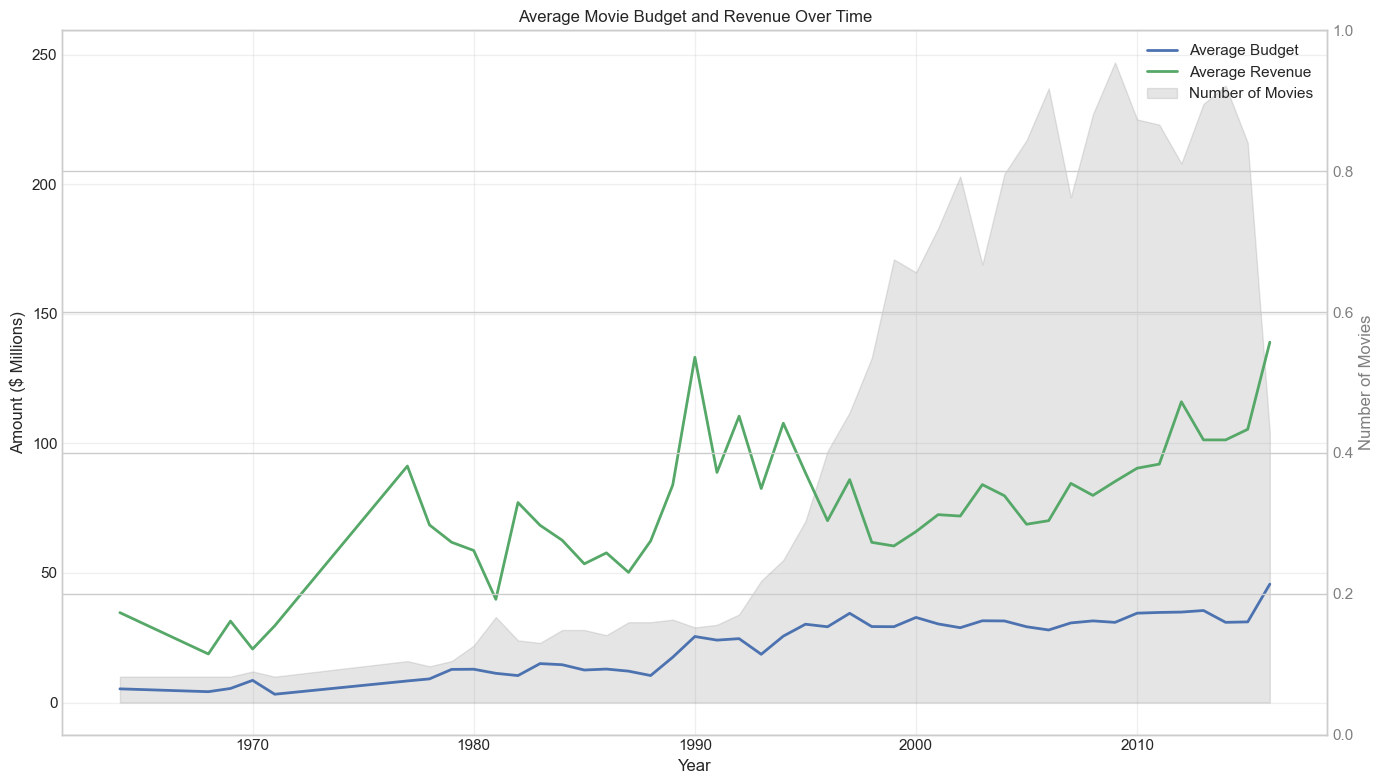

In [56]:
# Calculate average budget and revenue by year
yearly_stats = df.groupby('release_year').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'title': 'count'
}).reset_index()

# Filter years with at least 10 movies for more reliable averages
yearly_stats_filtered = yearly_stats[yearly_stats['title'] >= 10].copy()

# Plot budget and revenue trends
plt.figure(figsize=(14, 8))

# Plot average budget
plt.plot(yearly_stats_filtered['release_year'], yearly_stats_filtered['budget'] / 1e6, 
         'b-', linewidth=2, label='Average Budget')

# Plot average revenue
plt.plot(yearly_stats_filtered['release_year'], yearly_stats_filtered['revenue'] / 1e6, 
         'g-', linewidth=2, label='Average Revenue')

# Add movie count as area plot in the background
plt.fill_between(yearly_stats_filtered['release_year'], 0, yearly_stats_filtered['title'], 
                 alpha=0.2, color='gray', label='Number of Movies')

plt.title('Average Movie Budget and Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($ Millions)')
plt.grid(True, alpha=0.3)
plt.legend()

# Add a secondary y-axis for movie count
ax2 = plt.gca().twinx()
ax2.set_ylabel('Number of Movies', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.tight_layout()
plt.show()

The visualization of budget and revenue trends over time reveals several patterns:

1. **Increasing Budgets**: Movie budgets have generally increased over time, with a particularly steep rise from the 1990s to the 2010s. This reflects the growing scale and technical sophistication of modern filmmaking.

2. **Revenue Growth**: Revenues have also increased, often outpacing budgets, which indicates that the market for movies has expanded globally.

3. **Budget-Revenue Gap**: The gap between average revenue and budget has widened in some periods, suggesting potentially higher profitability, but has narrowed in others, indicating increased financial risk.

4. **Sample Size**: The gray area shows the number of movies in the dataset for each year, which helps contextualize the reliability of the averages. The sample size increases significantly in recent decades.

Now it's time to create a visual chart showing the relationship between type, budget and income:

KeyError: 9

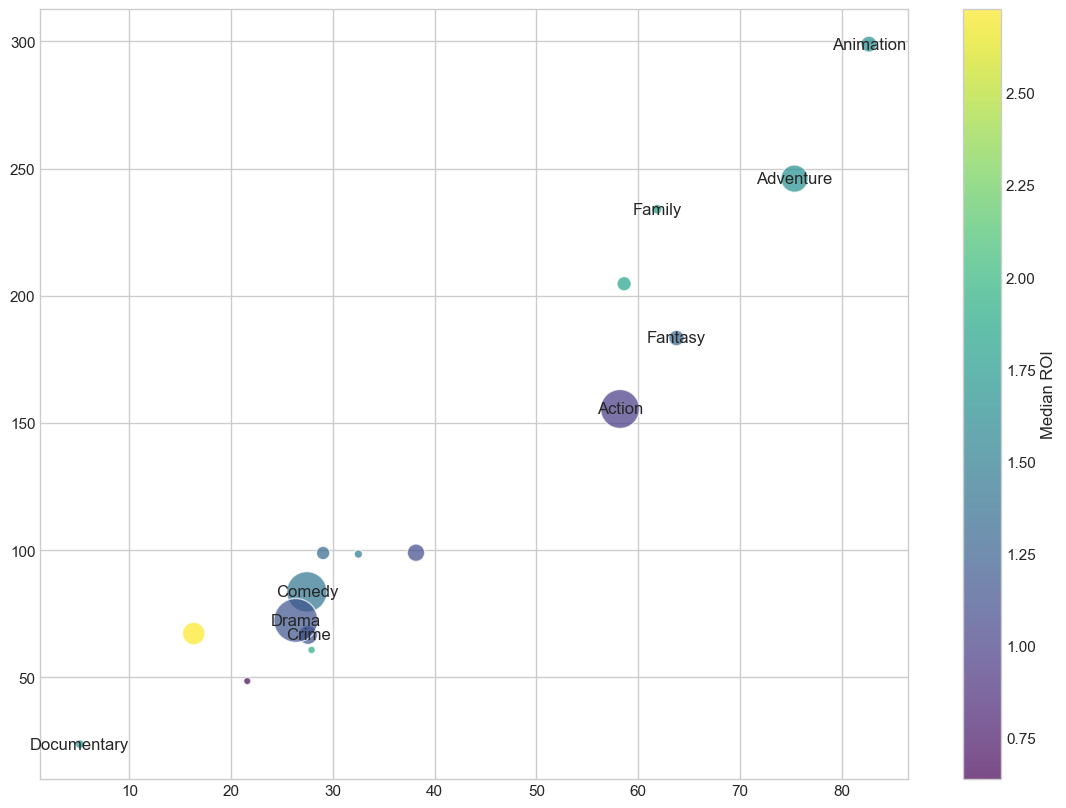

In [58]:
# Calculate average budget, revenue, and ROI by primary genre
genre_financials = df_fe.groupby('primary_genre').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'roi': 'median',
    'title': 'count'
}).reset_index()

# Filter to include only genres with at least 20 movies
genre_financials = genre_financials[genre_financials['title'] >= 20].copy()

# Create a bubble chart
plt.figure(figsize=(14, 10))

# Define bubble sizes based on movie count (scaled for visibility)
sizes = genre_financials['title'] / genre_financials['title'].max() * 1000

# Define colors based on median ROI
colors = genre_financials['roi']

# Create the scatter plot
scatter = plt.scatter(genre_financials['budget'] / 1e6, genre_financials['revenue'] / 1e6, 
                      s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolors='w')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Median ROI')

# Add genre labels to the bubbles
for i, genre in enumerate(genre_financials['primary_genre']):
    plt.annotate(genre, 
                 (genre_financials['budget'][i] / 1e6, genre_financials['revenue'][i] / 1e6),
                 ha='center', va='center')

# Add a reference line for break-even (revenue = budget)
max_val = max(genre_financials['budget'].max(), genre_financials['revenue'].max()) / 1e6
plt.plot([0, max_val], [0, max_val], 'r--', label='Break-even Line')

plt.title('Genre Financial Performance: Budget vs. Revenue')
plt.xlabel('Average Budget ($ Millions)')
plt.ylabel('Average Revenue ($ Millions)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

The bubble chart provides a comprehensive view of genre financial performance:

1. **Budget-Revenue Relationship**: All genres are positioned above the break-even line, indicating that on average, movies in each genre generate more revenue than their budget.

2. **Genre Differences**: There are clear differences in the financial characteristics of different genres:
   - Adventure, Animation, and Action genres have high budgets but also high revenues
   - Horror and Thriller genres have relatively low budgets but decent revenues, resulting in higher ROI
   - Drama and Comedy genres have moderate budgets and revenues

3. **Bubble Size**: The size of each bubble represents the number of movies in that genre, showing that Drama, Comedy, and Action are the most common genres in the dataset.

4. **Color Coding**: The color represents the median ROI, with brighter colors indicating higher returns. Horror stands out with a high ROI despite its lower budget and revenue.

Now, let's create a visualization that shows the distribution of ratings across different genres:

C:\Users\Hu Jiabao\AppData\Local\Temp\ipykernel_48416\1862344104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_genre', y='vote_average', data=df_fe[df_fe['primary_genre'].isin(genre_filtered)],


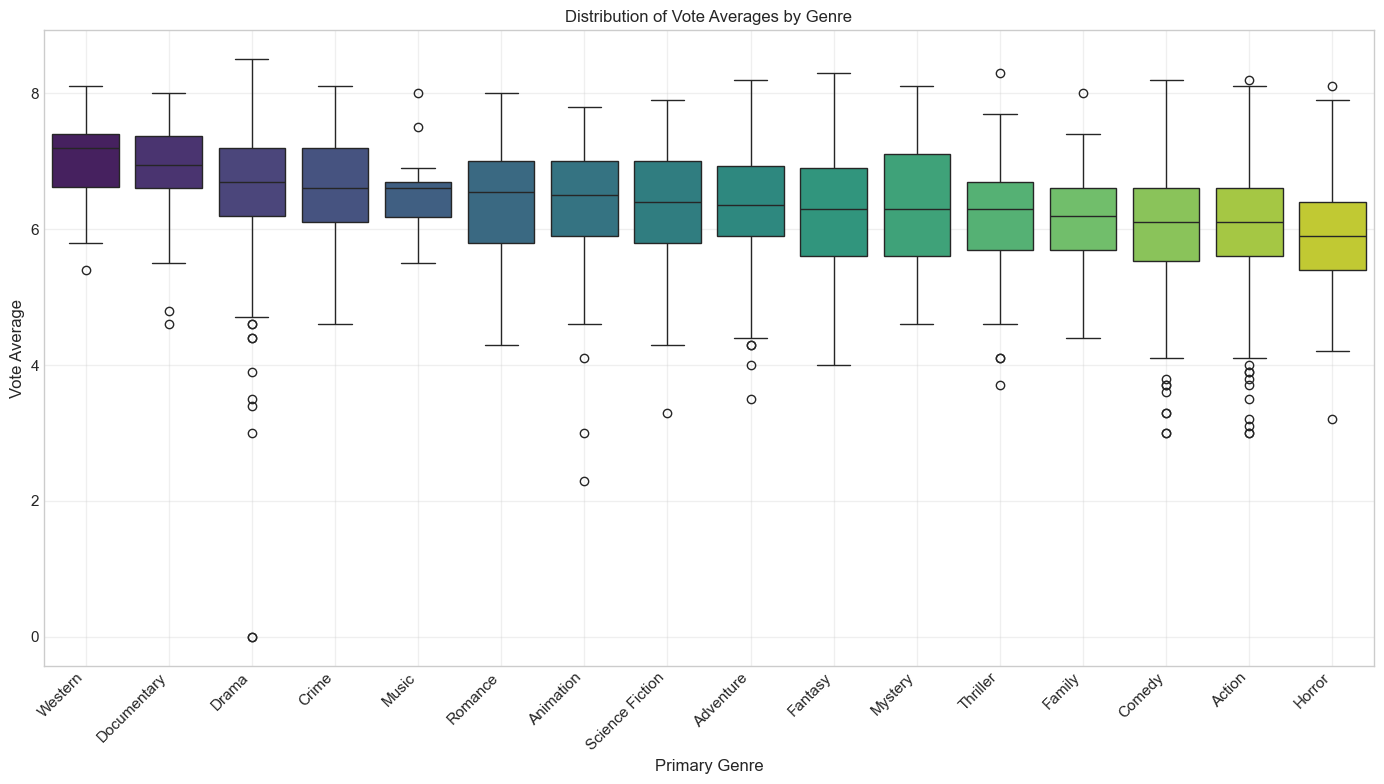

primary_genre  vote_average  vote_count  title
19          Western          7.04      762.68     22
5       Documentary          6.84      135.07     30
6             Drama          6.66      725.12    747
4             Crime          6.64      822.94    141
12            Music          6.55      308.35     20
14          Romance          6.42      775.93     70
1         Adventure          6.39     1680.52    288
2         Animation          6.37     1608.70     99
15  Science Fiction          6.34     1868.37     79
13          Mystery          6.33     1011.19     27
8           Fantasy          6.25     1354.00     93
16         Thriller          6.17     1030.58    118
7            Family          6.14     1104.37     38
0            Action          6.07     1279.26    588
3            Comedy          6.06      606.90    634
11           Horror          5.93      719.86    197

In [59]:
# Create a box plot of vote averages by primary genre
plt.figure(figsize=(14, 8))
genre_order = df_fe.groupby('primary_genre')['vote_average'].median().sort_values(ascending=False).index
genre_filtered = [g for g in genre_order if df_fe[df_fe['primary_genre'] == g].shape[0] >= 20]

# Create the box plot
sns.boxplot(x='primary_genre', y='vote_average', data=df_fe[df_fe['primary_genre'].isin(genre_filtered)], 
            order=genre_filtered, palette='viridis')

plt.title('Distribution of Vote Averages by Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate average ratings and vote counts by genre
genre_ratings = df_fe.groupby('primary_genre').agg({
    'vote_average': 'mean',
    'vote_count': 'mean',
    'title': 'count'
}).reset_index()

# Filter to include only genres with at least 20 movies
genre_ratings = genre_ratings[genre_ratings['title'] >= 20].sort_values('vote_average', ascending=False)

# Display the data
genre_ratings

The box plot of vote averages by genre reveals interesting patterns in audience and critic reception:

1. **Rating Variation**: There's considerable variation in ratings across genres, with some genres consistently receiving higher ratings than others.

2. **Top-Rated Genres**: Animation, Documentary, and Adventure genres have the highest median ratings, suggesting that these types of films tend to be well-received by audiences.

3. **Lower-Rated Genres**: Horror and Thriller genres have lower median ratings, despite their often good financial performance. This suggests a disconnect between critical/audience reception and commercial success for these genres.

4. **Rating Spread**: Some genres show wider spreads in their ratings, indicating more variability in quality or reception. Others have narrower distributions, suggesting more consistency.
Here's how to create a network visualisation chart to show the relationship between genres and producing countries:

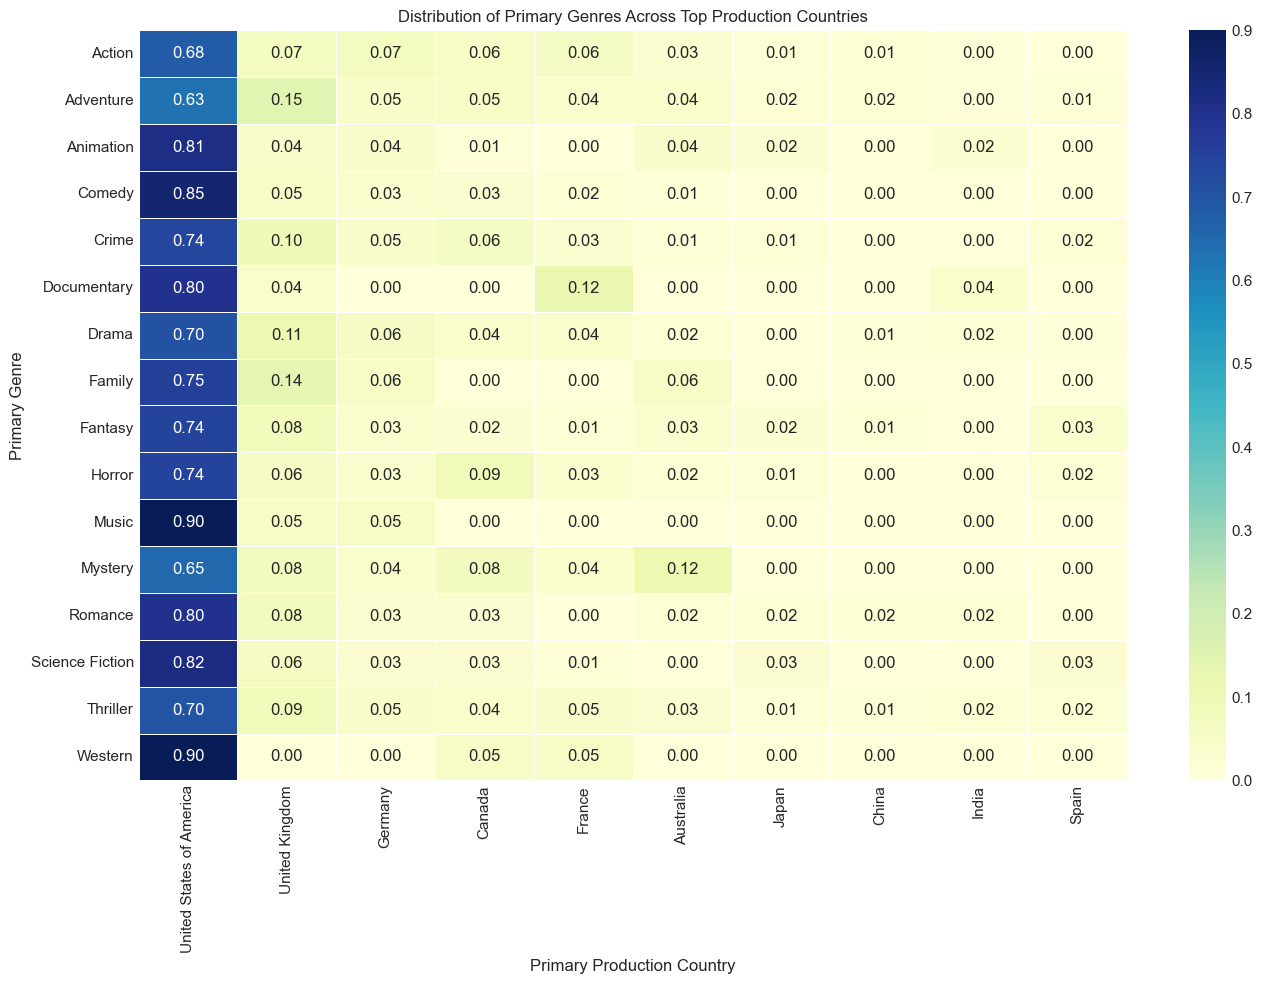

In [62]:
# Create a heatmap showing the relationship between primary genre and production country
# Extract primary production country
def extract_primary_country(countries_str):
    try:
        countries_list = json.loads(countries_str.replace("'", "\""))
        if countries_list:
            return countries_list[0]['name']
        else:
            return 'Unknown'
    except:
        return 'Unknown'

df_fe['primary_country'] = df_fe['production_countries'].apply(extract_primary_country)

# Get top 10 countries by movie count
top_countries = df_fe['primary_country'].value_counts().head(10).index.tolist()

# Create a cross-tabulation of genre and country
genre_country = pd.crosstab(df_fe['primary_genre'], df_fe['primary_country'])

# Filter to include only top countries and genres with at least 20 movies
genre_country_filtered = genre_country[top_countries]
genre_country_filtered = genre_country_filtered[genre_country_filtered.sum(axis=1) >= 20]

# Normalize by row (genre) for better visualization
genre_country_norm = genre_country_filtered.div(genre_country_filtered.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(genre_country_norm, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Distribution of Primary Genres Across Top Production Countries')
plt.xlabel('Primary Production Country')
plt.ylabel('Primary Genre')
plt.tight_layout()
plt.show()

The heatmap visualization reveals interesting patterns in the relationship between genres and production countries:

1. **Country Specialization**: Different countries show varying degrees of specialization in certain genres:
   - The United States has a relatively balanced distribution across genres but produces a higher proportion of Action and Adventure films
   - France has a stronger focus on Drama and Comedy
   - Japan shows a notable concentration in Animation
   - The United Kingdom has a higher proportion of Drama films

2. **Genre Globalization**: Some genres like Drama and Comedy are produced across all major film-producing countries, indicating their universal appeal.

3. **Niche Production**: Certain genres are more concentrated in specific countries, reflecting cultural preferences or industry strengths.

This visualization helps understand the cultural and industrial context of film production across different countries and how it influences genre preferences.

Finally, create an interactive visualisation tool that shows the relationship between multiple variables:

<Figure size 1600x1400 with 0 Axes>

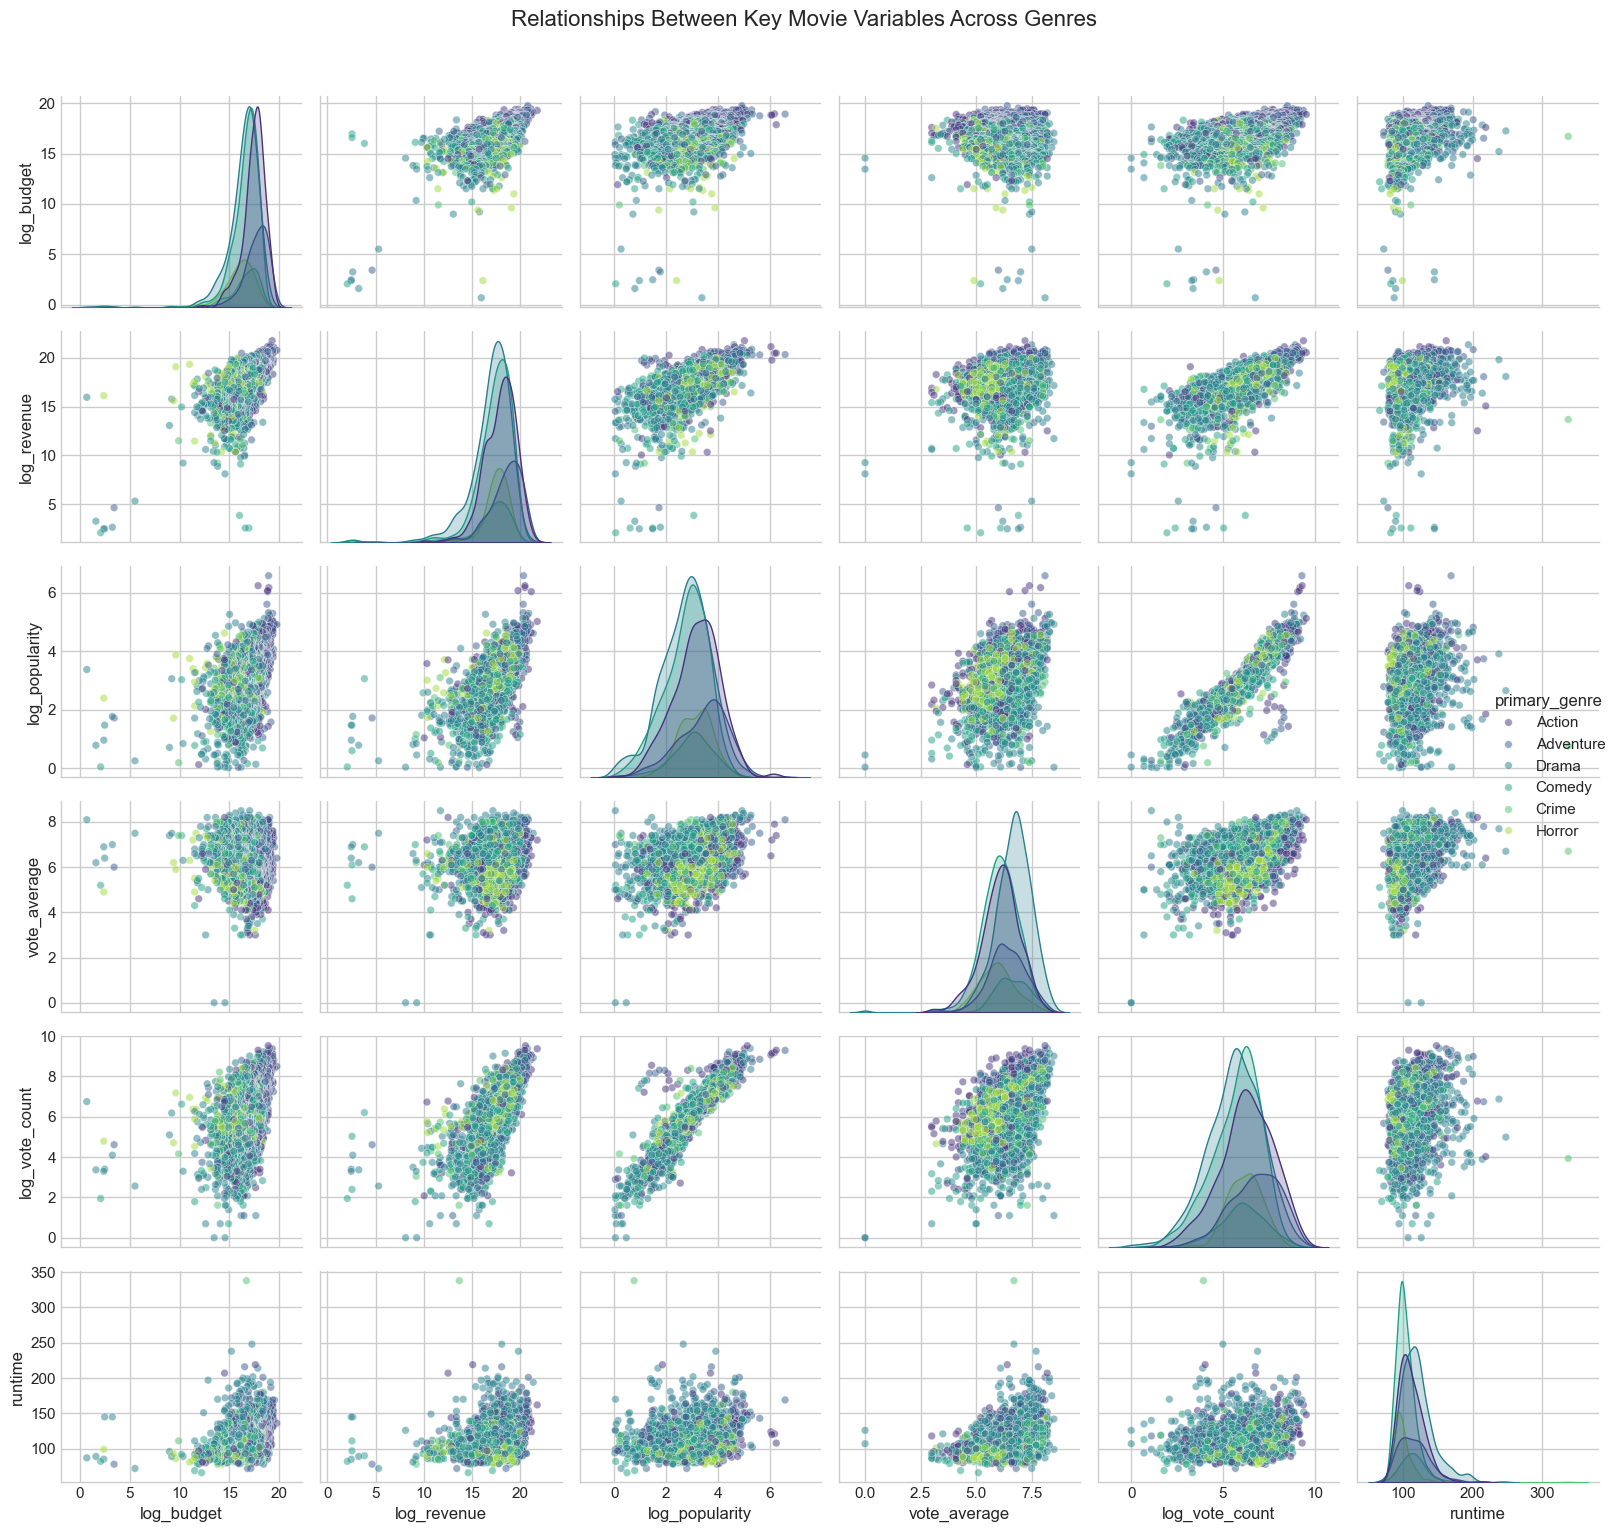

In [65]:
# Create a scatter plot matrix to visualize relationships between multiple variables
# Select relevant variables
scatter_vars = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']

# Create a copy with log-transformed variables for better visualization
scatter_df = df_fe[scatter_vars].copy()
for var in ['budget', 'revenue', 'popularity', 'vote_count']:
    scatter_df[var] = np.log1p(scatter_df[var])
    scatter_df.rename(columns={var: f'log_{var}'}, inplace=True)

# Add primary genre for color coding
scatter_df['primary_genre'] = df_fe['primary_genre']

# Filter to include only common genres for clearer visualization
common_genres = df_fe['primary_genre'].value_counts().head(6).index.tolist()
scatter_df_filtered = scatter_df[scatter_df['primary_genre'].isin(common_genres)]

# Create the scatter plot matrix
plt.figure(figsize=(16, 14))
sns.pairplot(scatter_df_filtered, hue='primary_genre', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 30})
plt.suptitle('Relationships Between Key Movie Variables Across Genres', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

The scatter plot matrix provides a comprehensive view of the relationships between multiple variables across different genres:

1. **Variable Relationships**: The matrix shows how each pair of variables relates to each other, revealing correlations and patterns:
   - Strong positive correlation between budget and revenue
   - Positive correlation between vote count and both budget and revenue
   - Weaker relationships between vote average and financial metrics

2. **Genre Differences**: The color coding by genre reveals how different genres cluster in the variable space:
   - Action and Adventure films tend to have higher budgets and revenues
   - Drama films span a wide range of budgets and revenues but tend to have lower popularity
   - Comedy films show moderate values across most metrics

3. **Distributions**: The diagonal plots show the distribution of each variable within each genre, highlighting differences in typical values and ranges.

This visualization helps understand the complex interrelationships between multiple aspects of movies and how these relationships vary across different genres.

Let's summarize our findings from the data visualization section:

### Data Visualization Summary

Our data visualization analysis has provided rich insights into the movie dataset through various visual representations:

1. **Temporal Trends**: The visualization of budget and revenue over time revealed increasing investments in filmmaking and growing market size, with both metrics showing significant growth since the 1990s.

2. **Genre Financial Performance**: The bubble chart highlighted the financial characteristics of different genres, showing that Adventure, Animation, and Action films have high budgets and revenues, while Horror films achieve high ROI despite lower budgets.

3. **Rating Distributions**: The box plot of ratings by genre showed that Animation, Documentary, and Adventure films receive the highest ratings, while Horror and Thriller films tend to receive lower ratings despite often being financially successful.

4. **Genre-Country Relationships**: The heatmap revealed specialization patterns in film production across countries, with certain nations showing stronger focus on specific genres, reflecting cultural preferences and industry strengths.

5. **Multivariate Relationships**: The scatter plot matrix provided a comprehensive view of how multiple variables relate to each other across different genres, highlighting both universal patterns and genre-specific characteristics.

These visualizations not only confirm findings from our earlier analyses but also provide deeper insights into the complex relationships and patterns within the movie industry data. They help communicate these insights in an accessible and intuitive manner, making the findings more actionable for decision-makers in the film industry.

## Conclusion

This comprehensive analysis of the movie dataset has provided valuable insights into the film industry through exploratory data analysis, data mining, and data visualization techniques.

### Key Findings

1. **Financial Patterns**:
   - Budget is the strongest predictor of revenue, with a correlation of 0.74
   - The median ROI is around 1.0, indicating that a typical movie doubles its budget in revenue
   - Profitability has generally decreased over the decades, suggesting increasing competition and costs
   - Summer and Winter releases tend to be more profitable than Spring and Fall releases

2. **Genre Insights**:
   - Drama is the most common genre, but Animation, Adventure, and Family genres have the highest profitability
   - Horror films achieve high ROI despite lower budgets and ratings
   - Different countries specialize in different genres, reflecting cultural preferences and industry strengths

3. **Movie Clusters**:
   - We identified four distinct types of movies: Mainstream Commercial Films, Blockbusters, Niche/Independent Films, and Critically Acclaimed Films
   - Each cluster has unique characteristics in terms of budget, revenue, popularity, and genre composition

4. **Temporal Trends**:
   - Movie production has increased significantly since the 1990s
   - Both budgets and revenues have grown over time, reflecting the expansion of the global film market
   - There's seasonality in movie releases, with certain months having more releases than others

### Implications

These findings have several implications for the film industry:

1. **Investment Decisions**: The strong relationship between budget and revenue suggests that higher investments often lead to higher returns, but the decreasing ROI over time indicates the need for careful budget planning.

2. **Genre Selection**: The varying profitability and rating patterns across genres can inform project selection and investment allocation, with certain genres offering better financial prospects than others.

3. **Release Timing**: The seasonal patterns in profitability highlight the importance of strategic release timing, with Summer and Winter being particularly favorable periods.

4. **Market Positioning**: Understanding the different movie clusters can help in positioning new projects appropriately, whether aiming for blockbuster status, critical acclaim, or niche appeal.

### Limitations 

While this analysis provides valuable insights, it has some limitations:

1. **Data Scope**: The dataset may not represent the entire film industry, particularly for non-English language films and independent productions.

2. **Temporal Coverage**: The analysis focuses on historical data and may not fully capture recent trends or future developments.

3. **External Factors**: The analysis doesn't account for external factors like marketing expenditure, competition, or broader economic conditions.
